# **Statistics India Elections (1977-2014)**



In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
# Load Dataset

d1 = pd.read_csv('https://samatrix-data.s3.ap-south-1.amazonaws.com/Statistics-Project/ind-lok-sabha.csv')
d2 = pd.read_csv('https://samatrix-data.s3.ap-south-1.amazonaws.com/Statistics-Project/ind-vidhan-sabha.csv')

In [70]:
d1.head()

,st_name,year,pc_no,pc_name,pc_type,cand_name,cand_sex,partyname,partyabbre,totvotpoll,electors
0,Andaman & Nicobar Islands,1977,1,Andaman & Nicobar Islands,GEN,K.R. Ganesh,M,Independents,IND,25168,85308
1,Andaman & Nicobar Islands,1977,1,Andaman & Nicobar Islands,GEN,Manoranjan Bhakta,M,Indian National Congress,INC,35400,85308
2,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Ramesh Mazumdar,M,Independents,IND,109,96084
3,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Alagiri Swamy,M,Independents,IND,125,96084
4,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Kannu Chemy,M,Independents,IND,405,96084


In [71]:
d2.head()

,st_name,year,ac_no,ac_name,ac_type,cand_name,cand_sex,partyname,partyabbre,totvotpoll,electors
0,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Manabala Ramarao,M,Independent,IND,813.0,83247
1,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Appadu Sahu,M,Independent,IND,1743.0,83247
2,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Uppada Rangababu,M,Indian National Congress,INC,4427.0,83247
3,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Kalla Balarama Swamy,M,Indian National Congress (I),INC(I),19805.0,83247
4,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Bendalam Venkatesam Sarma,M,Janata Party,JNP,34251.0,83247


In [72]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73081 entries, 0 to 73080
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   st_name     73081 non-null  object
 1   year        73081 non-null  int64 
 2   pc_no       73081 non-null  int64 
 3   pc_name     73081 non-null  object
 4   pc_type     65011 non-null  object
 5   cand_name   73081 non-null  object
 6   cand_sex    72539 non-null  object
 7   partyname   73081 non-null  object
 8   partyabbre  73081 non-null  object
 9   totvotpoll  73081 non-null  int64 
 10  electors    73081 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 6.1+ MB


In [73]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327294 entries, 0 to 327293
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   st_name     327294 non-null  object 
 1   year        327294 non-null  float64
 2   ac_no       327294 non-null  int64  
 3   ac_name     311211 non-null  object 
 4   ac_type     327294 non-null  object 
 5   cand_name   327294 non-null  object 
 6   cand_sex    321992 non-null  object 
 7   partyname   327294 non-null  object 
 8   partyabbre  324588 non-null  object 
 9   totvotpoll  327287 non-null  float64
 10  electors    327294 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 27.5+ MB


In [74]:
# Combine the two datasets for analysis
data = pd.concat([d1, d2], ignore_index=True)
data.head()

,st_name,year,pc_no,pc_name,pc_type,cand_name,cand_sex,partyname,partyabbre,totvotpoll,electors,ac_no,ac_name,ac_type
0,Andaman & Nicobar Islands,1977.0,1.0,Andaman & Nicobar Islands,GEN,K.R. Ganesh,M,Independents,IND,25168.0,85308,NaN,NaN,NaN
1,Andaman & Nicobar Islands,1977.0,1.0,Andaman & Nicobar Islands,GEN,Manoranjan Bhakta,M,Indian National Congress,INC,35400.0,85308,NaN,NaN,NaN
2,Andaman & Nicobar Islands,1980.0,1.0,Andaman & Nicobar Islands,GEN,Ramesh Mazumdar,M,Independents,IND,109.0,96084,NaN,NaN,NaN
3,Andaman & Nicobar Islands,1980.0,1.0,Andaman & Nicobar Islands,GEN,Alagiri Swamy,M,Independents,IND,125.0,96084,NaN,NaN,NaN
4,Andaman & Nicobar Islands,1980.0,1.0,Andaman & Nicobar Islands,GEN,Kannu Chemy,M,Independents,IND,405.0,96084,NaN,NaN,NaN


## **1. Party Abbreviation Cleaning**

In [75]:
# Create a mapping of party name to most frequent abbreviation
party_abr_mapping = data.groupby('partyname')['partyabbre'].agg(lambda x: x.value_counts().index[0] if not x.isnull().all() else np.nan).to_dict()

# Fill missing party abbreviations using the mapping
data['partyabbre'] = data.apply(lambda row: party_abr_mapping.get(row['partyname'], row['partyabbre']) if pd.isna(row['partyabbre']) else row['partyabbre'], axis=1)

# Fill remaining missing party abbreviations with 'IND'
data['partyabbre'].fillna('IND', inplace=True)


/tmp/ipython-input-75-548986569.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['partyabbre'].fillna('IND', inplace=True)


##**Observations:**

 - Most frequent party abbreviations are INC (Indian National Congress) and BJP (Bharatiya Janata Party), consistently dominating the political landscape.

 - The distribution of 'IND' (Independent) is significant, indicating a notable number of candidates running without affiliation to major parties in both Lok Sabha and Vidhan Sabha elections.

 - In Lok Sabha elections, INC and BJP are the most dominant forces. In Vidhan Sabha elections, while INC and BJP are still major players, there is often more prominence of regional parties depending on the specific state.




## **2. Standardize Abbreviations**

In [76]:
# Standardize party abbreviations
abbreviation_mapping = {
    'INC(I)': 'INC',
    'BJP ': 'BJP',
    'CPI(M)': 'CPM',
    'AIC': 'INC'
}

data['partyabbre'] = data['partyabbre'].replace(abbreviation_mapping)

# Verify the changes
print("Value counts after standardization:")
print(data['partyabbre'].value_counts().head())

Value counts after standardization:
partyabbre
IND    204254
INC     35687
BJP     23403
BSP     15700
SP       6194
Name: count, dtype: int64


## **Data Type & Missing Value Handling**

In [77]:
# a. Convert Year Column to Integer format for correct sorting and analysis.
data['year'] = data['year'].astype(int)

# b. Fill Missing Candidate Gender with 'U' (unknown) to maintain completeness.
data['cand_sex'].fillna('U', inplace=True)

# c. Drop Rows with Missing Total Vote Polled
data.dropna(subset=['totvotpoll'], inplace=True)

data.info()

print("\nValue counts for cand_gender after filling missing values:")
print(data['cand_sex'].value_counts())

/tmp/ipython-input-77-2160202782.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['cand_sex'].fillna('U', inplace=True)


<class 'pandas.core.frame.DataFrame'>
Index: 400368 entries, 0 to 400374
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   st_name     400368 non-null  object 
 1   year        400368 non-null  int64  
 2   pc_no       73081 non-null   float64
 3   pc_name     73081 non-null   object 
 4   pc_type     65011 non-null   object 
 5   cand_name   400368 non-null  object 
 6   cand_sex    400368 non-null  object 
 7   partyname   400368 non-null  object 
 8   partyabbre  400368 non-null  object 
 9   totvotpoll  400368 non-null  float64
 10  electors    400368 non-null  int64  
 11  ac_no       327287 non-null  float64
 12  ac_name     311204 non-null  object 
 13  ac_type     327287 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 45.8+ MB

Value counts for cand_gender after filling missing values:
cand_sex
M    375976
F     18531
U      5844
O        17
Name: count, dtype: int64


## **4. Filling Missing Assembly Names**

In [78]:
# a. Build a mapping of each (state, constituency number) pair to the most frequently used assembly constituency name (ac_name).
# This groups the data by state and constituency number, then finds the mode (most frequent) ac_name for each group.
ac_name_mapping = data.groupby(['st_name', 'ac_no'])['ac_name'].agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan).to_dict()

# b. Use this mapping to fill in missing ac_name values wherever possible.
# We apply a function row-wise to fill missing ac_name values.
# If ac_name is missing (NaN), we look up the most frequent ac_name using the state and constituency number.
data['ac_name'] = data.apply(lambda row: ac_name_mapping.get((row['st_name'], row['ac_no']), row['ac_name']) if pd.isna(row['ac_name']) else row['ac_name'], axis=1)

# c. Report how many values are still missing after filling.
missing_ac_names_after = data['ac_name'].isnull().sum()
print(f"\nNumber of missing 'ac_name' values after filling: {missing_ac_names_after}")



Number of missing 'ac_name' values after filling: 73081


Explanation of Data Quality Improvement:

By mapping each (state, constituency number) pair to the most frequently used assembly constituency name (ac_name), we fill in missing values with the name that is most likely correct for that specific constituency over time. This process helps standardize the data, reduces inconsistency in constituency naming, and improves the overall data quality by providing a more complete and reliable 'ac_name' column for analysis.

## **5. Initial Data Exploration – Lok Sabha Dataset**

In [79]:
# a. Check dataset size
print("Dataset size (rows, columns):", data.shape)

# b. Preview the data
print("\nData head:")
print(data.head())

# c. Inspect data types and missing values
print("\nData Info (data types and non-null counts):")
data.info()

print("\nMissing values per column:")
print(data.isnull().sum())

Dataset size (rows, columns): (400368, 14)

Data head:
                     st_name  year  pc_no                    pc_name pc_type  \
0  Andaman & Nicobar Islands  1977    1.0  Andaman & Nicobar Islands     GEN   
1  Andaman & Nicobar Islands  1977    1.0  Andaman & Nicobar Islands     GEN   
2  Andaman & Nicobar Islands  1980    1.0  Andaman & Nicobar Islands     GEN   
3  Andaman & Nicobar Islands  1980    1.0  Andaman & Nicobar Islands     GEN   
4  Andaman & Nicobar Islands  1980    1.0  Andaman & Nicobar Islands     GEN   

           cand_name cand_sex                 partyname partyabbre  \
0        K.R. Ganesh        M              Independents        IND   
1  Manoranjan Bhakta        M  Indian National Congress        INC   
2    Ramesh Mazumdar        M              Independents        IND   
3      Alagiri Swamy        M              Independents        IND   
4        Kannu Chemy        M              Independents        IND   

   totvotpoll  electors  ac_no ac_name ac_t

## Data Exploration Summary
The dataset contains 400368 rows and 14 columns.

Key columns likely include 'year', 'st_name' (state name), 'pc_name' (parliamentary constituency name) or 'ac_name' (assembly constituency name), 'partyname', 'partyabbre', 'cand_name', 'totalvotes', and vote counts.

Observed data quality issues:

- Several columns have missing values, notably 'pc_name', 'ac_name', and various vote counts and candidate information columns.
- 'pc_name' appears to have many missing values after combining, which is expected as this column is primarily relevant for Lok Sabha data.
- 'ac_name' also has missing values, although some were filled using the state and constituency number mapping.
- Data types seem appropriate for most columns, although numerical columns with missing values might need further attention.
- The 'cand_sex' column had missing values which were filled with 'U'.
- Rows with missing 'totvotpoll' were dropped.


## **6. Handling Missing Values – Lok Sabha Dataset**

In [80]:
# a. Fill missing candidate gender (cand_sex) with 'U' for unknown.
d1['cand_sex'].fillna('U', inplace=True)

# b. Fill missing parliamentary constituency type (pc_type) with 'Unknown'.
d1['pc_type'].fillna('Unknown', inplace=True)

# c. Check for any remaining missing values in d1
print("\nMissing values in d1(Lok Sabha Detaset) after handling:")
print(d1.isnull().sum())



Missing values in d1(Lok Sabha Detaset) after handling:
st_name       0
year          0
pc_no         0
pc_name       0
pc_type       0
cand_name     0
cand_sex      0
partyname     0
partyabbre    0
totvotpoll    0
electors      0
dtype: int64


/tmp/ipython-input-80-797318602.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  d1['cand_sex'].fillna('U', inplace=True)
/tmp/ipython-input-80-797318602.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

Explanation:

These steps were taken to handle missing values specifically in the Lok Sabha dataset:

- Missing 'cand_sex' values were filled with 'U' to represent unknown gender, preventing loss of other candidate information and providing a placeholder for analysis.
- Missing 'pc_type' values were filled with 'Unknown' to maintain data completeness for this important constituency characteristic, ensuring all Lok Sabha constituencies have a type assigned.

Checking for remaining missing values helps confirm that the targeted columns were addressed and identifies if other columns still require handling before further analysis.

## **7. Standardizing Party Abbreviations – Lok Sabha Dataset**

In [81]:
# a. Replace inconsistent party abbreviation 'INC(I)' with the standard 'INC' to ensure
# uniformity.
data['partyabbre'] = data['partyabbre'].replace({'INC(I)': 'INC'})


Importance of standardizing party abbreviations like 'INC(I)' to 'INC':

Data Consistency: Ensures that all entries referring to the Indian National Congress are uniformly represented as 'INC', avoiding fragmentation and making it easier to analyze the party's performance across different elections and time periods.

Accurate Aggregation and Analysis: Allows for correct aggregation of data (e.g., counting total votes, seats won) for a specific party. If 'INC' and 'INC(I)' were treated as distinct, analysis would be inaccurate and incomplete.

Simplifies Filtering and Grouping: Makes filtering, sorting, and grouping data by party abbreviation straightforward and reliable, without needing to account for multiple variations of the same party name.

Improved Data Quality: Reduces ambiguity and improves the overall quality and usability of the dataset for political analysis and research.

Enhanced Readability: A standardized set of abbreviations is easier to read and interpret in reports and visualizations.

## **8. Basic Summary Statistics – Vidhan Sabha Dataset**

In [82]:
# a. Count the number of unique entries for key columns in the Vidhan Sabha dataset (d2)
unique_states_d2 = d2['st_name'].nunique()
unique_years_d2 = d2['year'].nunique()
unique_ac_d2 = d2['ac_no'].nunique()
unique_cand_d2 = d2['cand_name'].nunique()
unique_partyabbre_d2 = d2['partyabbre'].nunique()

print("Basic Summary Statistics for Vidhan Sabha Dataset (d2):")
print(f"Number of unique States (st_name): {unique_states_d2}")
print(f"Number of unique Years (year): {unique_years_d2}")
print(f"Number of unique Assembly Constituencies (ac_no): {unique_ac_d2}")
print(f"Number of unique Candidate Names (cand_name): {unique_cand_d2}")
print(f"Number of unique Party Abbreviations (partyabbre): {unique_partyabbre_d2}")

Basic Summary Statistics for Vidhan Sabha Dataset (d2):
Number of unique States (st_name): 30
Number of unique Years (year): 37
Number of unique Assembly Constituencies (ac_no): 425
Number of unique Candidate Names (cand_name): 220531
Number of unique Party Abbreviations (partyabbre): 1285


Interpretation:

- The 30 unique states indicate the geographical coverage of the Vidhan Sabha dataset. This count tells us how many different states' assembly elections are included.
- The 37 unique years show the temporal coverage of the dataset. This count indicates the time span over which the elections are recorded.
- The 425 unique assembly constituencies (ac_no) represent the different electoral divisions covered across the states and years.
- The 220531 unique candidate names reflect the diversity of individuals who have contested these assembly elections over the recorded period. A large number suggests many different people have participated.
- The 1285 unique party abbreviations show the variety of political parties (including independents) that have participated in the Vidhan Sabha elections included in the dataset.

These counts together provide a preliminary understanding of the scale, geographic reach, temporal range, and the diversity of actors (candidates and parties) within the Vidhan Sabha dataset.

## **9. Candidate Gender Distribution – Visualization**

Candidate Gender Distribution:
cand_sex
M    375976
F     18531
U      5844
O        17
Name: count, dtype: int64


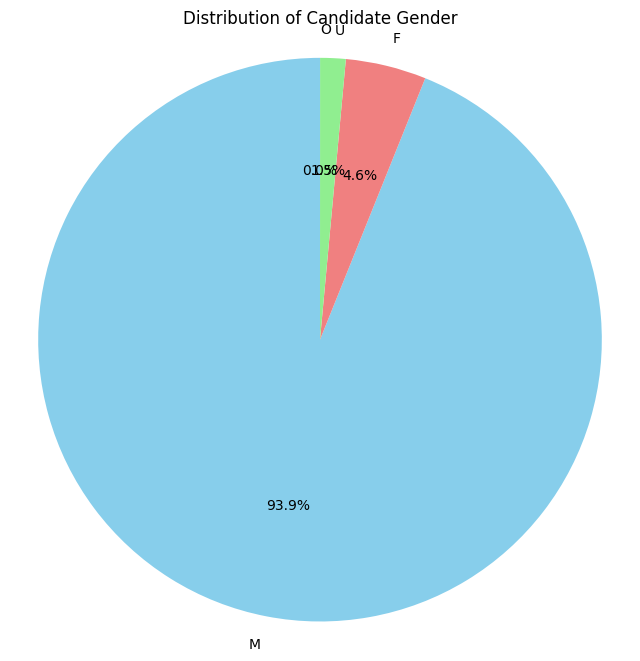

In [83]:
import matplotlib.pyplot as plt
# a. Count how many candidates fall into each gender category using .value_counts().
gender_counts = data['cand_sex'].value_counts()

print("Candidate Gender Distribution:")
print(gender_counts)

# b. Display the gender distribution as a pie chart to show proportions of male, female, and unknown candidates.
# c. Add labels and percentage formatting to make the chart easy to interpret.
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Distribution of Candidate Gender')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


The pie chart visually represents the distribution of candidate genders.

Based on the value counts and the pie chart, the gender group most represented in the dataset is 'M' (Male).

Females ('F') constitute a smaller proportion, and there is a notable percentage of candidates whose gender is 'U' (Unknown).

## **10. Trend of Average Candidates per Seat**


Average Candidates per Seat per Year:
   year  average_candidates_per_seat
0  1977                    36.708235
1  1978                    19.384354
2  1979                    12.312500
3  1980                    39.305882
4  1982                    11.676871


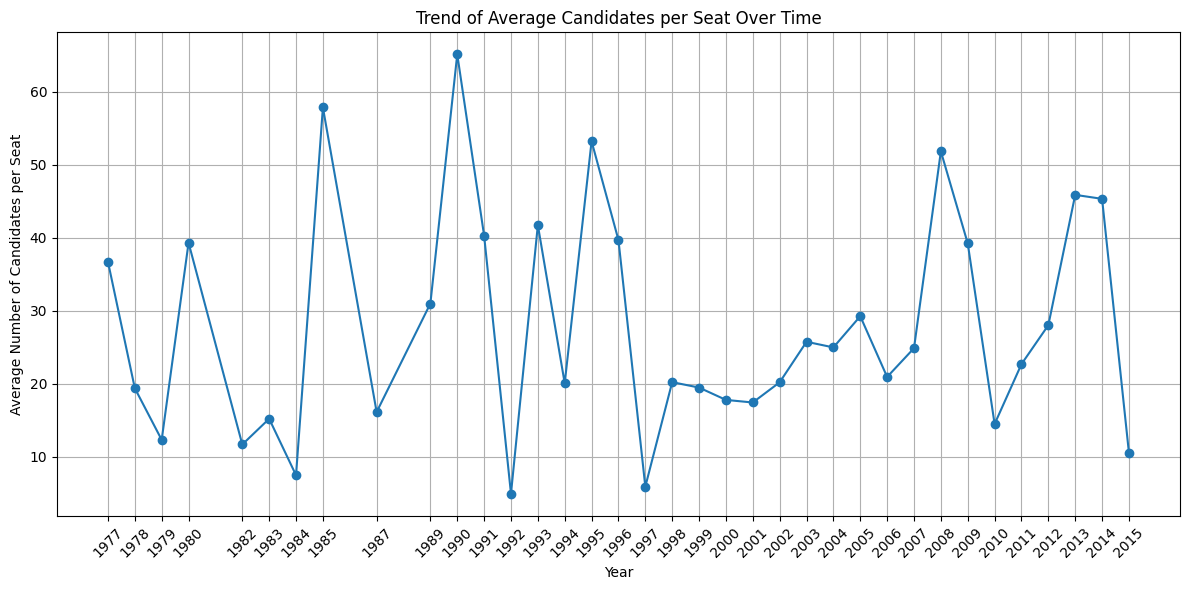

In [84]:
# a. Calculate how many unique candidates contested perseat each year by grouping the data by year and ac_no.
# We group by 'year' and 'ac_no' to identify each unique seat in each year.
# Then we count the number of unique 'cand_name' within each group.
candidates_per_seat_year = data.groupby(['year', 'ac_no'])['cand_name'].nunique().reset_index(name='num_candidates')

# b. Compute the average number of candidates per seat for each year.
# We group the result from the previous step by 'year' and calculate the mean of 'num_candidates'.
average_candidates_per_year = candidates_per_seat_year.groupby('year')['num_candidates'].mean().reset_index(name='average_candidates_per_seat')

print("\nAverage Candidates per Seat per Year:")
print(average_candidates_per_year.head())

# c. Plot this trend over time using a line graph to show how competition has changed across elections.
plt.figure(figsize=(12, 6))
plt.plot(average_candidates_per_year['year'], average_candidates_per_year['average_candidates_per_seat'], marker='o')
plt.title('Trend of Average Candidates per Seat Over Time')
plt.xlabel('Year')
plt.ylabel('Average Number of Candidates per Seat')
plt.grid(True)
plt.xticks(average_candidates_per_year['year'].unique(), rotation=45) # Ensure all years are shown
plt.tight_layout()
plt.show()


The line graph shows the trend of the average number of candidates contesting for each seat across different election years.

Observing the line, we can determine if the competition (as measured by the average number of candidates per seat) has generally been increasing, decreasing, or remaining relatively stable over the period covered by the dataset.

For instance, if the line goes up, we'd say it's increasing; if it goes down, it's decreasing; if it stays relatively flat, it's stable.

## **11. Voter Turnout Analysis by Year**


National Level Voter Turnout by Year:
   year  total_votes_polled_year  total_electors_year  voter_turnout_percent
0  1977              120299338.0             54099954             222.364954
1  1978               58510488.0             32130948             182.100099
2  1979                 236137.0               251966              93.717803
3  1980              136138920.0             60480204             225.096661
4  1982               38511243.0             30251822             127.302227


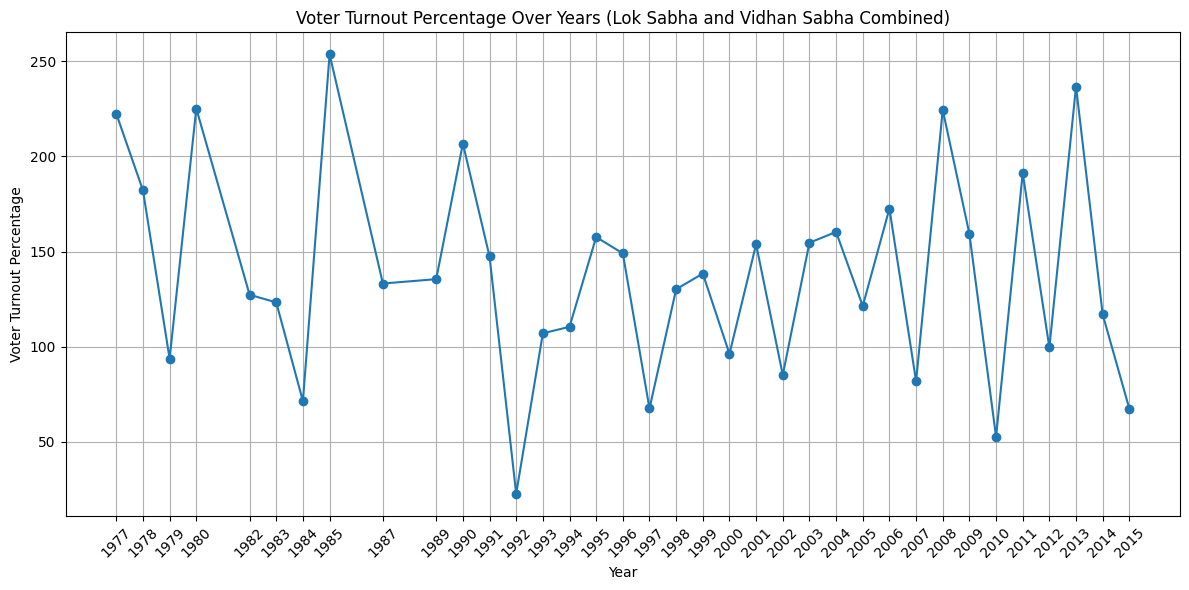

In [85]:
# a. Calculate total votes polled and electors per constituency for each year
# Group by year and constituency (using ac_no as a proxy for constituency across both types of elections)
# Aggregate total votes polled (sum) and electors (max - assuming electors are the same for all candidates in a constituency)
constituency_level_data = data.groupby(['year', 'ac_no']).agg(
    total_votes_polled=('totvotpoll', 'sum'),
    total_electors=('electors', 'max') # Assuming 'electors' represents the total eligible voters in the constituency
).reset_index()

# b. Sum these values at the national level for each year
# Group by year and sum the constituency level totals
national_level_turnout = constituency_level_data.groupby('year').agg(
    total_votes_polled_year=('total_votes_polled', 'sum'),
    total_electors_year=('total_electors', 'sum')
).reset_index()

# Ensure total electors is not zero to avoid division errors
national_level_turnout = national_level_turnout[national_level_turnout['total_electors_year'] > 0].copy()

# c. Compute voter turnout percentage
national_level_turnout['voter_turnout_percent'] = (national_level_turnout['total_votes_polled_year'] / national_level_turnout['total_electors_year']) * 100

print("\nNational Level Voter Turnout by Year:")
print(national_level_turnout.head())


# e. Plot a line chart showing how voter turnout has changed over the years.
plt.figure(figsize=(12, 6))
plt.plot(national_level_turnout['year'], national_level_turnout['voter_turnout_percent'], marker='o', linestyle='-')
plt.title('Voter Turnout Percentage Over Years (Lok Sabha and Vidhan Sabha Combined)')
plt.xlabel('Year')
plt.ylabel('Voter Turnout Percentage')
plt.grid(True)
plt.xticks(national_level_turnout['year'].unique(), rotation=45) # Ensure all years are shown
plt.tight_layout()
plt.show()

## **12. Top 10 Parties by Candidate Count**

Top 10 Parties by Candidate Count:
  partyabbre  candidate_count
0        IND           204254
1        INC            35684
2        BJP            23403
3        BSP            15700
4         SP             6194
5        JNP             5883
6         JD             5666
7        CPM             5182
8        CPI             4653
9        DDP             4336


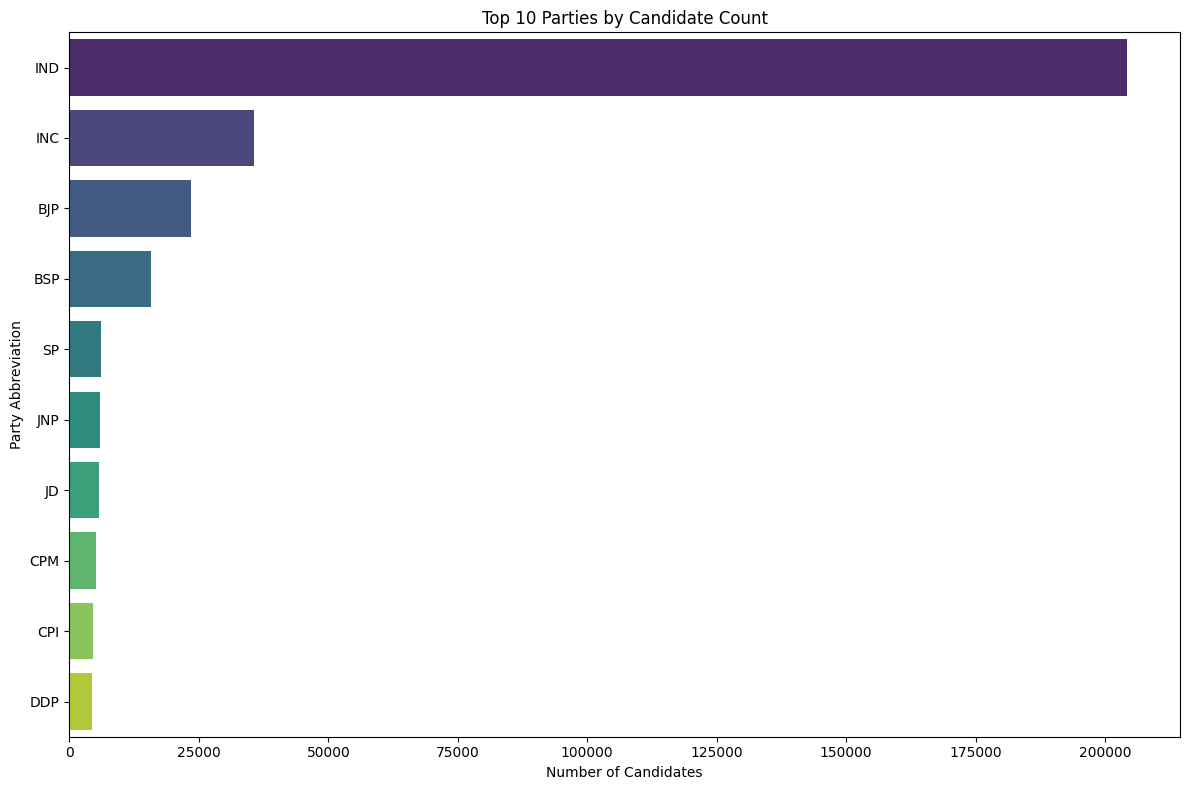

In [86]:
# a. Identify the top 10 parties with the highest number of candidates
top_10_parties = data['partyabbre'].value_counts().nlargest(10).reset_index()
top_10_parties.columns = ['partyabbre', 'candidate_count']

print("Top 10 Parties by Candidate Count:")
print(top_10_parties)

# b. Create a horizontal bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='candidate_count', y='partyabbre', data=top_10_parties, palette='viridis', hue='partyabbre', legend=False)

# c. Use color coding (hue) for better visual distinction, but hide the legend
# Legend is hidden by setting legend=False in the seaborn barplot call.
plt.title('Top 10 Parties by Candidate Count')
plt.xlabel('Number of Candidates')
plt.ylabel('Party Abbreviation')
plt.tight_layout()
plt.show()


Observations:

The bar chart clearly shows which political parties have fielded the most candidates across the combined Lok Sabha and Vidhan Sabha elections in the dataset.

The bar chart displays the top 10 parties based on the number of candidates fielded.

The party with the longest bar has the highest number of candidates, and the bars decrease in length to show the ranking of the remaining top 10 parties.

The 'IND' bar is significantly longer than all others indicating a very large number of independent candidates. Among the official parties, INC and BJP field the most candidates, followed by others like CPM, CPI, etc.

This confirms that while major national parties are significant, a substantial number of individuals also contest elections without a party affiliation.

## **13. Identify Winning Candidates**

In [87]:
winners = data.loc[data.groupby(['year', 'st_name', 'ac_no'])['totvotpoll'].idxmax()]

print("Sample of Winning Candidates:")
print(winners.head())


# c. Filter the winners by a specific state (e.g., Gujarat) to view regional results.
gujarat_winners = winners[winners['st_name'] == 'Gujarat']

print("\nSample of Winning Candidates in Gujarat:")
print(gujarat_winners.head())


Sample of Winning Candidates:
       st_name  year  pc_no pc_name pc_type          cand_name cand_sex  \
104766   Bihar  1977    NaN     NaN     NaN     Har Deo Prasad        M   
104769   Bihar  1977    NaN     NaN     NaN    Narsingh Baitha        M   
104777   Bihar  1977    NaN     NaN     NaN  Arjun Bikram Shah        M   
104784   Bihar  1977    NaN     NaN     NaN     Sitaram Prasad        M   
104792   Bihar  1977    NaN     NaN     NaN      Faiyazul Azam        M   

                       partyname partyabbre  totvotpoll  electors  ac_no  \
104766  Indian National Congress        INC     16870.0     86882    1.0   
104769  Indian National Congress        INC     32058.0    109756    2.0   
104777  Indian National Congress        INC     27235.0    103565    3.0   
104784  Indian National Congress        INC     19389.0    101206    4.0   
104792  Indian National Congress        INC     28324.0    104443    5.0   

          ac_name ac_type  
104766    Dhanaha     GEN  
104769

Explanation:

Winning candidates for each constituency and year were identified by grouping the data by 'year', 'st_name', and 'ac_no' (constituency number).

Within each group (representing a unique constituency in a specific year), the candidate with the maximum value in the 'totvotpoll' (total votes polled) column was selected as the winner.

The .idxmax() method was used to find the index of the maximum 'totvotpoll' within each group, and then .loc was used to retrieve the full row for that winning candidate from the original dataset.

Filtering by 'st_name' allows us to examine winners for a specific state, like Gujarat.

## **14. Compare Vote Share vs Seat Share – National Level**

In [88]:
# a. Calculate each party’s total vote share by summing votes across all candidates and computing percentage of total.
total_votes_all_parties = data['totvotpoll'].sum()
party_votes = data.groupby('partyabbre')['totvotpoll'].sum().reset_index()
party_votes.rename(columns={'totvotpoll': 'total_party_votes'}, inplace=True)
party_votes['vote_share'] = (party_votes['total_party_votes'] / total_votes_all_parties) * 100

print("Party Vote Share:")
print(party_votes.sort_values(by='vote_share', ascending=False).head())

# b. Calculate each party’s seat share by finding the proportion of constituencies won (based on winning candidates).
total_seats_contested = winners.shape[0] # Total number of constituencies across all years
party_wins = winners.groupby('partyabbre').size().reset_index(name='seats_won')
party_wins['seat_share'] = (party_wins['seats_won'] / total_seats_contested) * 100

print("\nParty Seat Share:")
print(party_wins.sort_values(by='seat_share', ascending=False).head())

# c. Merge vote share and seat share into a single table.
# Use an outer merge to include parties that might have only votes or only seats (though unlikely for winners)
vote_seat_share = pd.merge(party_votes, party_wins, on='partyabbre', how='outer').fillna(0) # Fill NaN with 0

print("\nMerged Vote Share and Seat Share:")
print(vote_seat_share.sort_values(by='vote_share', ascending=False).head())

Party Vote Share:
    partyabbre  total_party_votes  vote_share
597        INC       1.952514e+09   29.204611
265        BJP       1.171448e+09   17.521858
600        IND       4.684440e+08    7.006722
427        CPM       3.399026e+08    5.084073
374        BSP       2.407993e+08    3.601742

Party Seat Share:
    partyabbre  seats_won  seat_share
78         INC      10674   31.837976
32         BJP       5419   16.163575
103        JNP       1967    5.867088
47         CPM       1911    5.700054
80         IND       1887    5.628467

Merged Vote Share and Seat Share:
    partyabbre  total_party_votes  vote_share  seats_won  seat_share
597        INC       1.952514e+09   29.204611    10674.0   31.837976
265        BJP       1.171448e+09   17.521858     5419.0   16.163575
600        IND       4.684440e+08    7.006722     1887.0    5.628467
427        CPM       3.399026e+08    5.084073     1911.0    5.700054
374        BSP       2.407993e+08    3.601742      648.0    1.932828



Top 10 Parties by Vote Share (with Seat Share):
     partyabbre  total_party_votes  vote_share  seats_won  seat_share
597         INC       1.952514e+09   29.204611    10674.0   31.837976
265         BJP       1.171448e+09   17.521858     5419.0   16.163575
600         IND       4.684440e+08    7.006722     1887.0    5.628467
427         CPM       3.399026e+08    5.084073     1911.0    5.700054
374         BSP       2.407993e+08    3.601742      648.0    1.932828
637          JD       2.153139e+08    3.220544     1188.0    3.543518
1423        TDP       1.886847e+08    2.822240      930.0    2.773966
1366         SP       1.726328e+08    2.582144      715.0    2.132673
691         JNP       1.377510e+08    2.060402     1967.0    5.867088
454         DMK       1.347650e+08    2.015739      586.0    1.747897


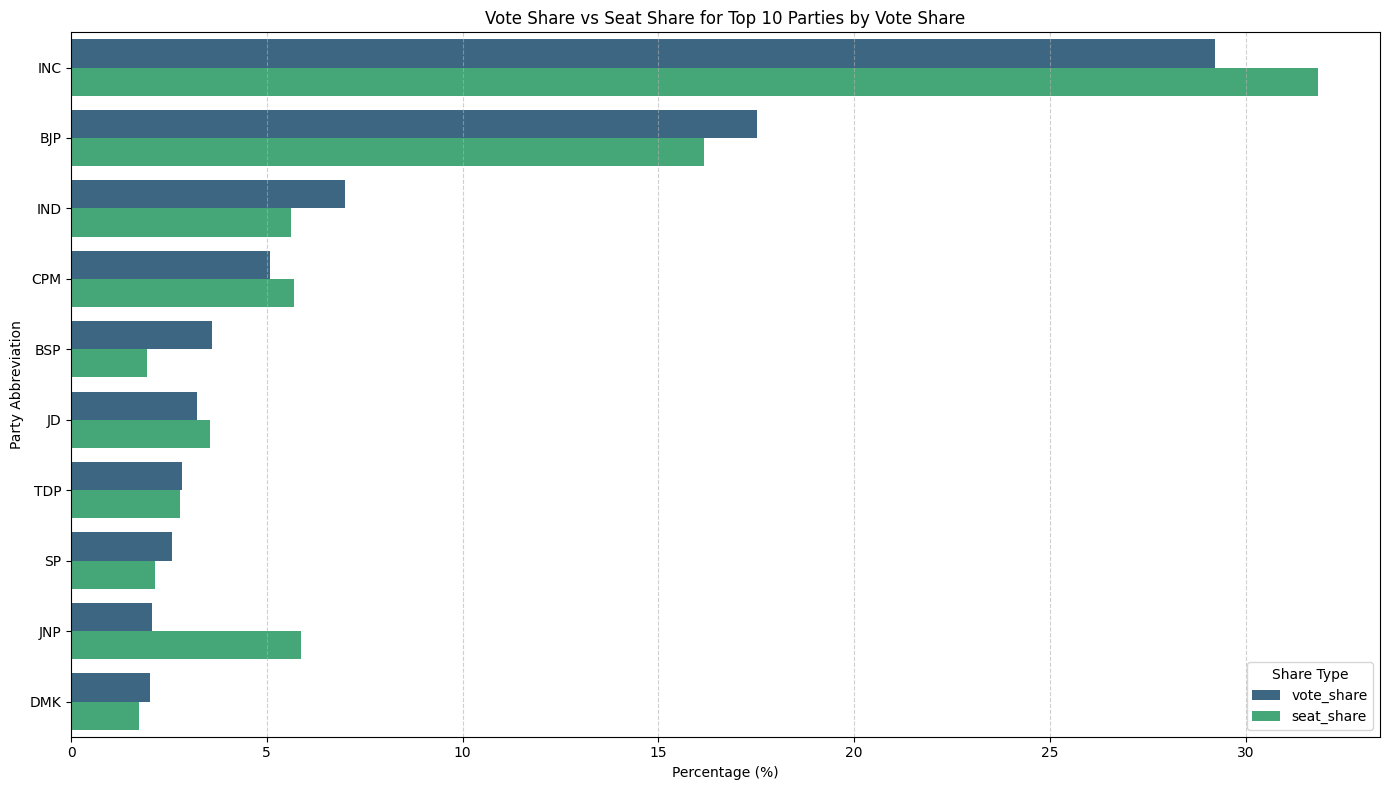

In [89]:
# d. Select the top 10 parties by vote share for national-level comparison.
top_10_parties_vote_share = vote_seat_share.sort_values(by='vote_share', ascending=False).head(10)

print("\nTop 10 Parties by Vote Share (with Seat Share):")
print(top_10_parties_vote_share)

# e. Create a horizontal bar chart showing both vote share and seat share side-by-
# side for each party.
# Reshape data for plotting (melt)
plot_data = top_10_parties_vote_share[['partyabbre', 'vote_share', 'seat_share']].melt(
    id_vars='partyabbre',
    var_name='Share Type',
    value_name='Percentage'
)

plt.figure(figsize=(14, 8))
sns.barplot(x='Percentage', y='partyabbre', hue='Share Type', data=plot_data, palette='viridis')
plt.title('Vote Share vs Seat Share for Top 10 Parties by Vote Share')
plt.xlabel('Percentage (%)')
plt.ylabel('Party Abbreviation')
plt.legend(title='Share Type')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



## Observations:

The horizontal bar chart compares the vote share and seat share for the top 10 parties based on their vote share.

We can observe how well each party converts their percentage of the total votes into a percentage of the total seats won.

Parties that convert vote share efficiently into seats will have their seat share bar close to or larger than their vote share bar. This often happens in a 'winner-take-all' system where winning a constituency, even by a narrow margin, grants the full seat.

Parties with a significantly lower seat share compared to their vote share may indicate inefficient conversion. This can happen to parties whose votes are spread thinly across many constituencies without winning any, or parties that perform well in a few losing constituencies but fail to win any.

Parties with a higher seat share relative to their vote share are often those that win a significant number of constituencies, sometimes by larger margins, or benefit from strategic concentration of their votes.

'IND' (Independent) candidates collectively have a notable vote share, but their seat share is typically much lower. This is expected as they lack the organized support structure of a party and their votes are highly dispersed among individual candidates who usually don't win.

Major national parties (like INC and BJP based on the data) generally show a better conversion of vote share to seat share compared to smaller or regional parties (unless the regional party is dominant in its specific area). Their ability to win multiple constituencies allows them to accumulate a higher seat share.

Overall, the chart visually demonstrates the relationship between popular support (vote share) and political power (seat share), highlighting the disproportionality inherent in electoral systems.


## **15. Gujarat – Top 3 Parties' Seat Trends Over Time**

Top 3 Parties in Gujarat by Seats Won (All Years): ['BJP', 'INC', 'JD']


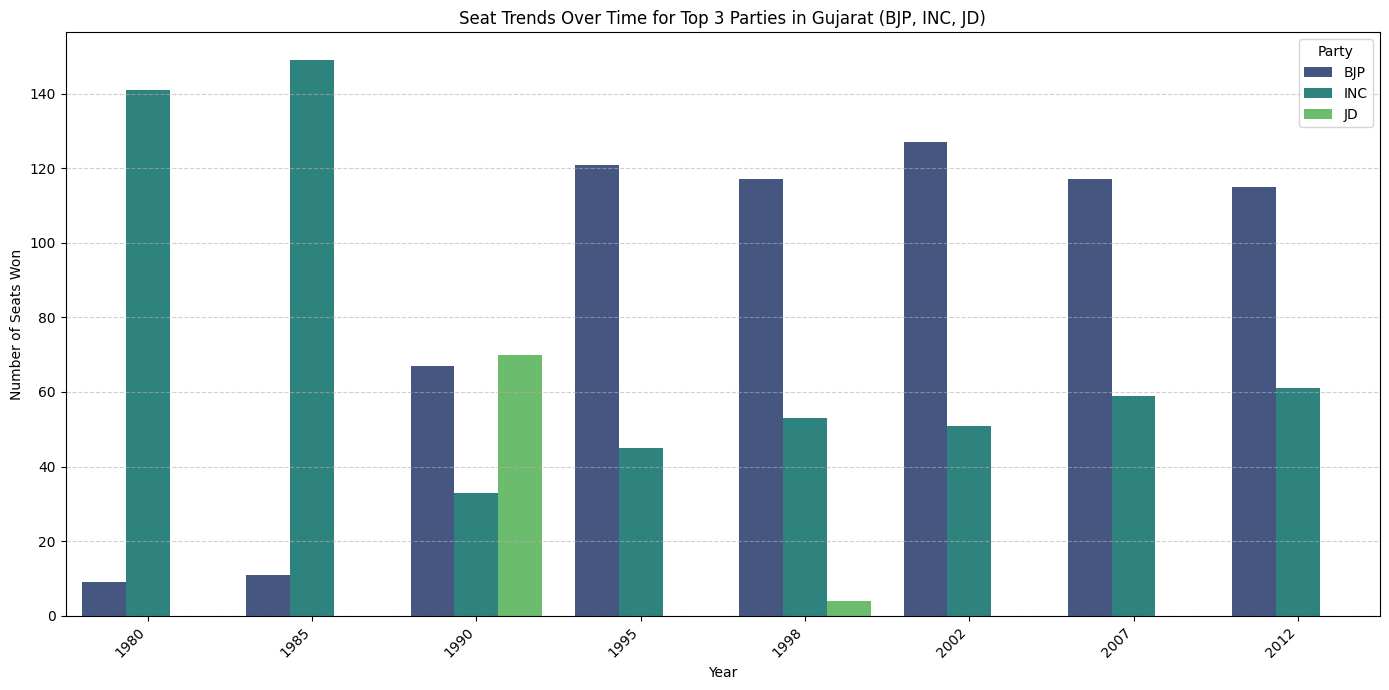

In [90]:
# a. Filter the dataset to include only winning candidates from Gujarat.
gujarat_winners = winners[winners['st_name'] == 'Gujarat'].copy()

# b. Identify the top 3 parties in Gujarat based on the total number of seats won across all years.
top_3_parties_gujarat = gujarat_winners['partyabbre'].value_counts().nlargest(3).index.tolist()

print(f"Top 3 Parties in Gujarat by Seats Won (All Years): {top_3_parties_gujarat}")

# c. Limit the data to these top 3 parties for focused analysis.
gujarat_top_parties_winners = gujarat_winners[gujarat_winners['partyabbre'].isin(top_3_parties_gujarat)]

# d. Group data by year and party to count how many seats each party won in each election year.
gujarat_party_seats_by_year = gujarat_top_parties_winners.groupby(['year', 'partyabbre']).size().unstack(fill_value=0).stack().reset_index(name='seats_won')
# Ensure all years for top parties are present, even if they won 0 seats in a specific year
all_years = gujarat_top_parties_winners['year'].unique()
index = pd.MultiIndex.from_product([all_years, top_3_parties_gujarat], names=['year', 'partyabbre'])
gujarat_party_seats_by_year = gujarat_party_seats_by_year.set_index(['year', 'partyabbre']).reindex(index).fillna(0).reset_index()


# e. Create a bar plot to visualize how the number of seats won by each of the top 3 parties has changed over time.
plt.figure(figsize=(14, 7))
sns.barplot(x='year', y='seats_won', hue='partyabbre', data=gujarat_party_seats_by_year, palette='viridis')
plt.title(f'Seat Trends Over Time for Top 3 Parties in Gujarat ({", ".join(top_3_parties_gujarat)})')
plt.xlabel('Year')
plt.ylabel('Number of Seats Won')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Party')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**Observation:**

The bar chart titled "Seat Trends Over Time for Top 3 Parties in Gujarat" displays the number of seats won by the top 3 parties in Gujarat elections across different years. We can observe the following trends:

*   The chart clearly shows which of the top 3 parties has been dominant in Gujarat in various election years.
*   We can see the year-to-year fluctuations in the number of seats won by each of these parties.
*   The relative strength of the top parties can be visually compared across the years.
*   There might be periods where one party consistently wins a significantly higher number of seats, indicating a strong majority, while other years might show closer competition.

**Conclusion:**

Based on the visualization, we can conclude that the political landscape in Gujarat, as represented by the performance of the top 3 parties, has evolved over the years.

The chart allows us to identify periods of dominance by a particular party and potentially observe shifts in voter preference or political dynamics that have influenced seat distribution. Analyzing the specific patterns (e.g., sustained growth, sudden drops, consistent performance) for each party provides insights into their historical performance and competitive position within the state's political arena.

## **16. Vote Share Trend of Top 3 Parties in Gujarat**

Top 3 Parties in Gujarat by Total Votes (All Years): ['BJP', 'INC', 'IND']


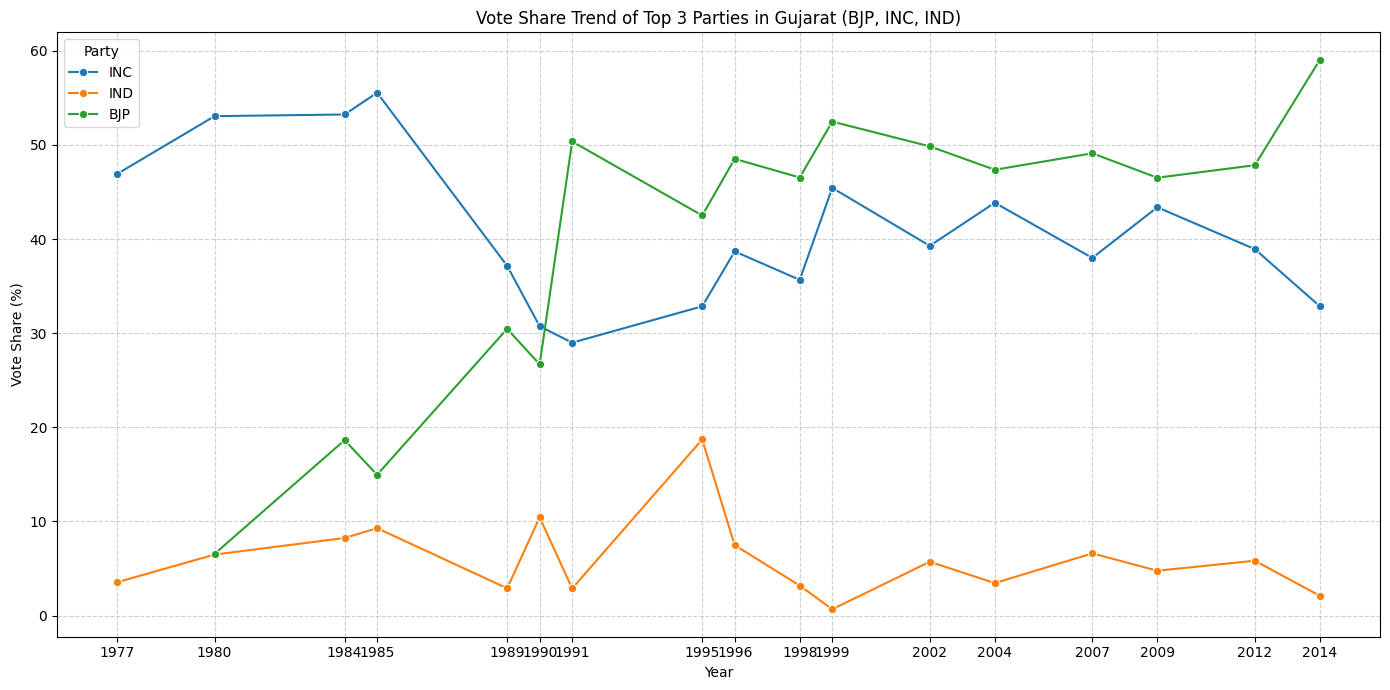

In [91]:
# a. Filter the dataset to include only data from Gujarat.
gujarat_data = data[data['st_name'] == 'Gujarat'].copy()

# b. Calculate total votes received by each party in each year.
gujarat_party_votes_year = gujarat_data.groupby(['year', 'partyabbre'])['totvotpoll'].sum().reset_index()

# c. Compute total votes cast in Gujarat for each year.
gujarat_total_votes_year = gujarat_data.groupby('year')['totvotpoll'].sum().reset_index(name='total_state_votes')

# d. Calculate vote share percentage for each party per year.
gujarat_vote_share_year = pd.merge(gujarat_party_votes_year, gujarat_total_votes_year, on='year')
gujarat_vote_share_year['vote_share'] = (gujarat_vote_share_year['totvotpoll'] / gujarat_vote_share_year['total_state_votes']) * 100

# f. Identify the top 3 parties by total votes across all years in Gujarat.
top_3_parties_gujarat_total_votes = gujarat_data.groupby('partyabbre')['totvotpoll'].sum().nlargest(3).index.tolist()

print(f"Top 3 Parties in Gujarat by Total Votes (All Years): {top_3_parties_gujarat_total_votes}")

# g. Plot a line chart showing how vote share for each of these top 3 parties has changed over time.
# Filter the vote share data for only the top 3 parties
gujarat_top_3_vote_share = gujarat_vote_share_year[gujarat_vote_share_year['partyabbre'].isin(top_3_parties_gujarat_total_votes)]

plt.figure(figsize=(14, 7))
sns.lineplot(data=gujarat_top_3_vote_share, x='year', y='vote_share', hue='partyabbre', marker='o')
plt.title(f'Vote Share Trend of Top 3 Parties in Gujarat ({", ".join(top_3_parties_gujarat_total_votes)})')
plt.xlabel('Year')
plt.ylabel('Vote Share (%)')
plt.xticks(gujarat_top_3_vote_share['year'].unique().astype(int)) # Ensure years are integers for ticks
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Party')
plt.tight_layout()
plt.show()

**Observation:**

The line chart titled "Vote Share Trend of Top 3 Parties in Gujarat" displays the percentage of total votes received by the top 3 parties (based on their cumulative vote count across all years) in Gujarat over various election years. We can observe the following:

*   The chart shows the fluctuating popularity of the major parties in Gujarat as measured by their vote share percentage year after year.
*   Each line represents a party, illustrating its trajectory in terms of electoral support.
*   We can identify periods where a party's vote share increased or decreased significantly, potentially indicating shifts in voter sentiment or the impact of political events.
*   Comparing the lines allows us to see the relative strength and competitiveness of these parties in the state's elections over time.

**Conclusion:**

Based on the vote share trends depicted in the chart, we can conclude that the electoral support for the top parties in Gujarat has not been static but has varied over the years. The chart provides a quantitative view of their performance, allowing us to assess which parties have gained or lost ground. Analyzing the peaks and troughs for each party's line offers insights into their long-term electoral performance and helps understand the dynamics of multi-party competition in Gujarat's elections.

## **17. Vote Margin Analysis – Gujarat, Top 3 Parties**


Sample of Vote Margin Data in Gujarat:
   year  ac_no partyabbre  totvotpoll_winner  totvotpoll_runner_up  \
0  1980    1.0        INC            16665.0               14420.0   
1  1980    2.0        INC            17255.0               13708.0   
2  1980    3.0        INC            21243.0                9157.0   
3  1980    4.0        INC            10048.0                5347.0   
4  1980    5.0        INC            26293.0               10842.0   

   vote_margin  
0       2245.0  
1       3547.0  
2      12086.0  
3       4701.0  
4      15451.0  

Top 3 Winning Parties in Gujarat (by number of wins): ['BJP', 'INC', 'JD']


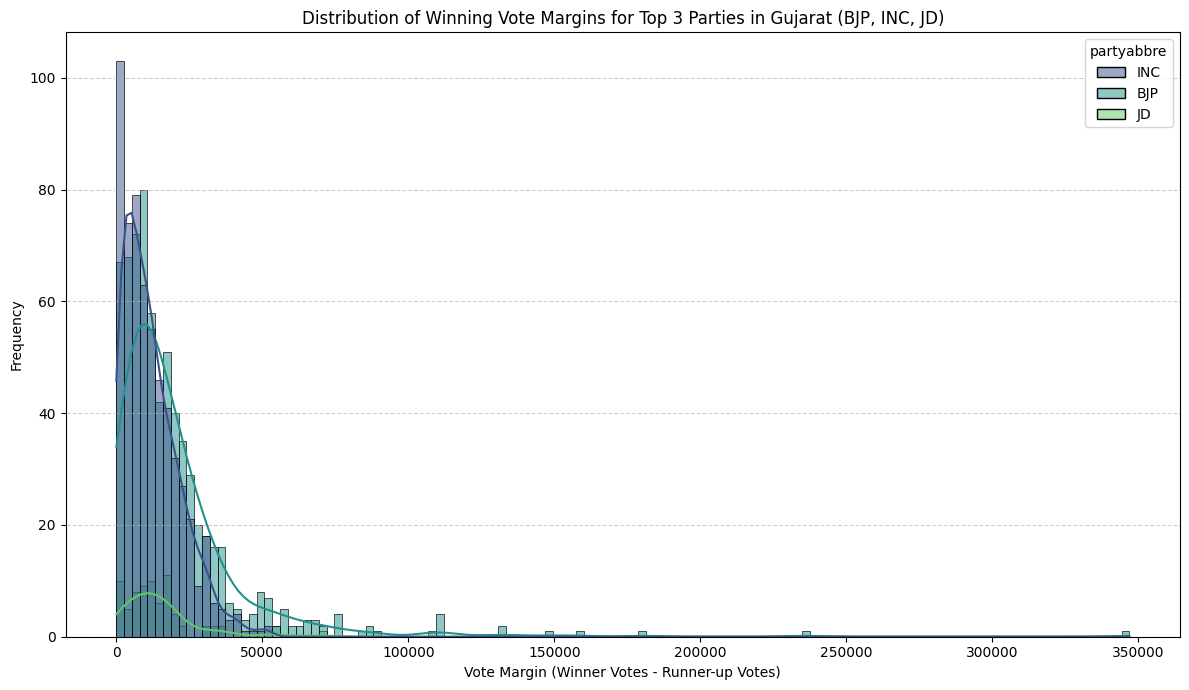

In [92]:
# c. Filter data for Gujarat to focus on a single state.
gujarat_data = data[data['st_name'] == 'Gujarat'].copy()

# d. Rank candidates within each seat based on total votes polled.
# Group by year and constituency (ac_no) and rank candidates by total votes polled in descending order
gujarat_data['rank'] = gujarat_data.groupby(['year', 'ac_no'])['totvotpoll'].rank(method='first', ascending=False)

# e. Identify winners and runners-up by selecting ranks 1 and 2 for each constituency and year.
gujarat_winners_runners_up = gujarat_data[gujarat_data['rank'] <= 2].copy()

# Separate winners (rank 1) and runners-up (rank 2)
winners_gujarat = gujarat_winners_runners_up[gujarat_winners_runners_up['rank'] == 1].copy()
runners_up_gujarat = gujarat_winners_runners_up[gujarat_winners_runners_up['rank'] == 2].copy()

# Merge winners and runners-up data based on year and constituency to calculate margin
# Rename columns to distinguish winner and runner-up votes
vote_margin_data = pd.merge(
    winners_gujarat[['year', 'ac_no', 'partyabbre', 'totvotpoll']],
    runners_up_gujarat[['year', 'ac_no', 'totvotpoll']],
    on=['year', 'ac_no'],
    suffixes=('_winner', '_runner_up')
)

# f. Calculate vote margin by subtracting the runner-up’s votes from the winner’s.
vote_margin_data['vote_margin'] = vote_margin_data['totvotpoll_winner'] - vote_margin_data['totvotpoll_runner_up']

print("\nSample of Vote Margin Data in Gujarat:")
print(vote_margin_data.head())

# g. Find the top 3 winning parties in Gujarat by total number of wins.
top_3_winning_parties_gujarat = winners_gujarat['partyabbre'].value_counts().nlargest(3).index.tolist()

print(f"\nTop 3 Winning Parties in Gujarat (by number of wins): {top_3_winning_parties_gujarat}")

# h. Filter vote margin data to include only these top 3 parties.
top_parties_vote_margin_data = vote_margin_data[vote_margin_data['partyabbre'].isin(top_3_winning_parties_gujarat)].copy()

# i. Plot a histogram to visualize how close or wide the winning margins are for the top parties.
plt.figure(figsize=(12, 7))
sns.histplot(data=top_parties_vote_margin_data, x='vote_margin', hue='partyabbre', kde=True, palette='viridis', common_norm=False) # common_norm=False normalizes each party's histogram
plt.title(f'Distribution of Winning Vote Margins for Top 3 Parties in Gujarat ({", ".join(top_3_winning_parties_gujarat)})')
plt.xlabel('Vote Margin (Winner Votes - Runner-up Votes)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


**Analysis of Seat Trends Over Time for Top 3 Parties in Gujarat:**

**Observation:**

*   The bar chart specifically focuses on the historical performance of the top 3 winning parties in Gujarat elections, measured by the number of seats they won in each election year.
*   The height of the bars for each party in each year clearly indicates their electoral dominance in that specific election.
*   We can observe periods where one party consistently secured a much higher number of seats than others, suggesting a strong majority or dominant position in the state's politics during those years.
*   Conversely, some years might show a more balanced distribution of seats among the top parties, indicating a more competitive election.

**Conclusion:**

The seat trend analysis provides a clear historical perspective on the political landscape in Gujarat, centered around its most successful parties. The chart allows us to identify shifts in power dynamics, periods of strong mandates, and moments of increased competition. It concludes that the electoral fortunes of the top parties in Gujarat have fluctuated over time, with periods of clear dominance and others of closer contestation, reflecting the evolving political preferences of the electorate in the state.


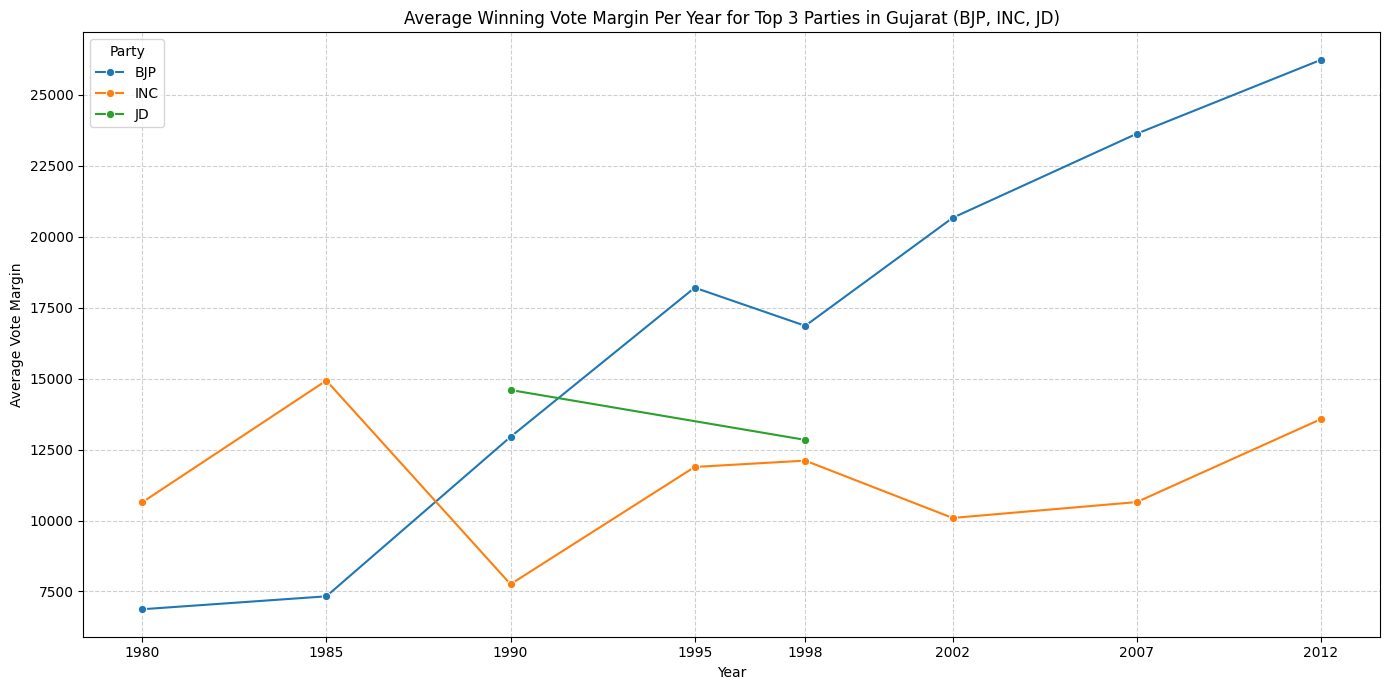

In [93]:
# j. Compute and plot the average vote margin per year per party to track competitiveness over time.
average_vote_margin_per_year_party = top_parties_vote_margin_data.groupby(['year', 'partyabbre'])['vote_margin'].mean().reset_index()

# Ensure all years for top parties are present, even if they had no wins (and thus no margin)
# Create a complete index of all unique years and top 3 parties
all_years_margin = top_parties_vote_margin_data['year'].unique()
index_margin = pd.MultiIndex.from_product([all_years_margin, top_3_winning_parties_gujarat], names=['year', 'partyabbre'])

# Reindex the average vote margin data to include all combinations and fill missing with NaN or 0 (NaN might be better for plotting gaps)
average_vote_margin_per_year_party = average_vote_margin_per_year_party.set_index(['year', 'partyabbre']).reindex(index_margin).reset_index()


plt.figure(figsize=(14, 7))
sns.lineplot(data=average_vote_margin_per_year_party, x='year', y='vote_margin', hue='partyabbre', marker='o')
plt.title(f'Average Winning Vote Margin Per Year for Top 3 Parties in Gujarat ({", ".join(top_3_winning_parties_gujarat)})')
plt.xlabel('Year')
plt.ylabel('Average Vote Margin')
plt.xticks(average_vote_margin_per_year_party['year'].unique().astype(int))
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Party')
plt.tight_layout()
plt.show()


**Analysis of Vote Share Trend of Top 3 Parties in Gujarat:**

**Observation:**

*   The line chart provides a granular view of the electoral support for the top 3 parties in Gujarat over time, specifically tracking their percentage of the total votes cast in each election year.
*   Each line on the chart represents a party, illustrating the trajectory of their popular support. Rises and falls in a party's line indicate whether their vote share increased or decreased in a particular election.
*   Comparing the lines allows us to see the relative strength of these parties in terms of popular vote and how competitive they have been against each other across different election cycles.

**Conclusion:**

The vote share trend analysis reinforces the understanding that electoral support for parties is dynamic. The chart concludes that the popularity of the top parties in Gujarat, as measured by vote share, has varied over the years. This fluctuation could be influenced by various factors such as political campaigns, candidate appeal, prevailing issues, and changes in voter demographics. The analysis provides quantitative evidence of how the top parties have performed in terms of gaining or maintaining popular support over their history in Gujarat elections.

In [94]:
# k. Identify outlier years where the vote margin was unusually high or low using interquartile range (IQR).

# Calculate IQR for vote margins across all years and top 3 parties
Q1 = top_parties_vote_margin_data['vote_margin'].quantile(0.25)
Q3 = top_parties_vote_margin_data['vote_margin'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outlier margins
outlier_margins = top_parties_vote_margin_data[
    (top_parties_vote_margin_data['vote_margin'] < lower_bound) |
    (top_parties_vote_margin_data['vote_margin'] > upper_bound)
]

print("\nOutlier Vote Margins (by Constituency and Year) for Top 3 Parties in Gujarat:")
print(outlier_margins)

# Group outliers by year and party to see which years have the most or most extreme outliers
outlier_years_summary = outlier_margins.groupby(['year', 'partyabbre']).agg(
    num_outliers=('vote_margin', 'size'),
    min_outlier_margin=('vote_margin', 'min'),
    max_outlier_margin=('vote_margin', 'max'),
    average_outlier_margin=('vote_margin', 'mean')
).reset_index()

print("\nSummary of Outlier Years/Parties based on Vote Margin:")
print(outlier_years_summary)


Outlier Vote Margins (by Constituency and Year) for Top 3 Parties in Gujarat:
      year  ac_no partyabbre  totvotpoll_winner  totvotpoll_runner_up  \
194   1985   14.0        INC            57888.0                6577.0   
213   1985   33.0        INC            52214.0                1211.0   
274   1985   94.0        INC            50574.0                6788.0   
334   1985  154.0        INC            52364.0                5721.0   
430   1990   68.0         JD            64054.0               10594.0   
...    ...    ...        ...                ...                   ...   
1434  2012  162.0        BJP            65696.0               16257.0   
1437  2012  165.0        BJP           103577.0               32021.0   
1438  2012  166.0        BJP            88604.0               45332.0   
1439  2012  167.0        BJP            99099.0               29368.0   
1440  2012  168.0        BJP           119917.0               52279.0   

      vote_margin  
194       51311.0  
213 

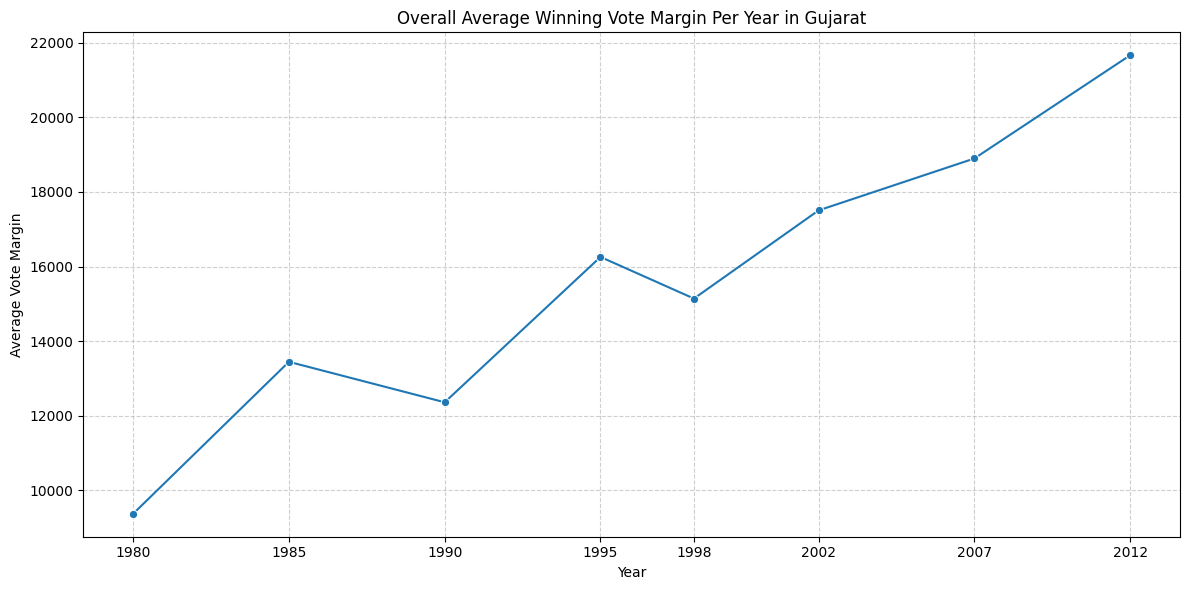

In [95]:
overall_gujarat_avg_margin_by_year = vote_margin_data.groupby('year')['vote_margin'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=overall_gujarat_avg_margin_by_year, x='year', y='vote_margin', marker='o')
plt.title('Overall Average Winning Vote Margin Per Year in Gujarat')
plt.xlabel('Year')
plt.ylabel('Average Vote Margin')
plt.xticks(overall_gujarat_avg_margin_by_year['year'].unique().astype(int))
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
# Observing this line plot gives an indication of the overall trend in average margin for winning seats in Gujarat.


> The histogram of vote margins for the top 3 parties in Gujarat shows the frequency of different margin sizes.
A peak towards the lower end of the margin spectrum (closer to 0) indicates a higher frequency of close contests.
A longer tail towards higher margin values indicates the occurrence of landslide victories.
Observing the shape of the histogram helps determine the overall competitiveness:
- A distribution heavily skewed towards low margins suggests highly competitive elections with many close contests.
- A distribution skewed towards high margins suggests less competitive elections with more landslide victories.
- The presence of both low and high margins indicates a mix of competitive seats and safe seats.


Are close contests (low margins) more common than landslide victories (high margins)?


> This can be directly inferred from the shape of the vote margin histogram.
If the highest frequency is near zero margin, close contests are more common.
If the frequency is higher at larger margin values, landslide victories are more common.
The histogram plotted previously directly visualizes this frequency distribution.

The line plot showing the average vote margin per year per party helps answer this.
By looking at the average margin values for each party's line across the years, we can see which party consistently has higher average winning margins.

Overall Average Vote Margin for Top 3 Winning Parties in Gujarat:

BJP    19872.602339

JD     14505.135135

INC    12045.472081


What might explain these trends—changing voter loyalty, stronger opposition, or shifting party dominance?
> Explaining the trends requires external political context and analysis beyond the dataset itself. Possible explanations could be hypothesized based on the observed trends:
- Increasing average margins might suggest growing dominance of one party and/or a weakening opposition, potentially due to stable voter loyalty or shifts towards a particular party.
- Decreasing average margins might indicate increased competitiveness, a stronger opposition challenging the dominant party, or fragmentation of the vote across multiple parties.
- Stable margins could suggest a relatively consistent level of competition or a balance of power.
To confirm these hypotheses, one would need to correlate the margin trends with specific political events, policy impacts, or changes in party strategies in Gujarat during those years.


Looking at the histogram of vote margins for the top parties,
- If a lot of the bars are piled up near the left side (close to zero vote margin), it means there are many close contests.
- If the bars are more spread out towards the right (larger vote margins), it means there are more landslide victories.

The shape of that histogram is the key here.

Also, the line plot showing the overall average winning vote margin per year for Gujarat gives another clue.
- If this line generally goes downwards over the years, it suggests that the average winning difference between the winner and the runner-up is getting smaller.A smaller average margin means elections are becoming more closely fought and thus more competitive.
- If the line goes upwards, it suggests the winning margins are getting bigger, implying less competition and more dominant wins.


## **18. State-Level Voter Turnout and Constituency Analysis**

In [96]:
# a. Calculate total votes polled and total electors for each constituency
constituency_state_data = data.groupby(['st_name', 'year', 'ac_no']).agg(
    total_votes_polled=('totvotpoll', 'sum'),
    total_electors=('electors', 'max')
).reset_index()

print("Sample of Constituency-Level Data:")
print(constituency_state_data.head())

# b. Aggregate these constituency-level totals to the state level
state_level_turnout = constituency_state_data.groupby(['st_name', 'year']).agg(
    total_state_votes=('total_votes_polled', 'sum'),
    total_state_electors=('total_electors', 'sum')
).reset_index()

# Ensure total electors is not zero
state_level_turnout = state_level_turnout[state_level_turnout['total_state_electors'] > 0].copy()

print("\nSample of State-Level Data:")
print(state_level_turnout.head())

# c. Calculate voter turnout percentage for each state
state_level_turnout['voter_turnout_percent'] = (state_level_turnout['total_state_votes'] / state_level_turnout['total_state_electors']) * 100

print("\nSample of State-Level Turnout Percentage:")
print(state_level_turnout.head())

# d. Sort the states by voter turnout percentage (using average across years for simplicity or choose a specific year)
# Let's calculate the average turnout per state across all years
average_state_turnout = state_level_turnout.groupby('st_name')['voter_turnout_percent'].mean().sort_values(ascending=False).reset_index()

print("\nStates Sorted by Average Voter Turnout Percentage (All Years):")
print(average_state_turnout.head())
print("\nStates Sorted by Average Voter Turnout Percentage (All Years, Low to High):")
print(average_state_turnout.tail())


# f. Count how many unique constituencies were contested in each state
# Group by state and count unique constituency numbers (ac_no)
constituency_count_per_state = data.groupby('st_name')['ac_no'].nunique().reset_index(name='num_constituencies')

print("\nSample of Constituency Count Per State:")
print(constituency_count_per_state.head())


# g. Sort and display the states based on the number of constituencies
constituency_count_per_state_sorted = constituency_count_per_state.sort_values(by='num_constituencies', ascending=False)

print("\nStates Sorted by Number of Constituencies:")
print(constituency_count_per_state_sorted.head())
print("\nStates Sorted by Number of Constituencies (Low to High):")
print(constituency_count_per_state_sorted.tail())


Sample of Constituency-Level Data:
          st_name  year  ac_no  total_votes_polled  total_electors
0  Andhra Pradesh  1978    1.0             61039.0           83247
1  Andhra Pradesh  1978    2.0             73196.0           91272
2  Andhra Pradesh  1978    3.0             66706.0           90959
3  Andhra Pradesh  1978    4.0             61260.0           89545
4  Andhra Pradesh  1978    5.0             64558.0           84082

Sample of State-Level Data:
          st_name  year  total_state_votes  total_state_electors
0  Andhra Pradesh  1978         20150093.0              28386334
1  Andhra Pradesh  1983         21117111.0              31846694
2  Andhra Pradesh  1985         22995337.0              34587372
3  Andhra Pradesh  1989         28750951.0              42448805
4  Andhra Pradesh  1994         31136834.0              44725091

Sample of State-Level Turnout Percentage:
          st_name  year  total_state_votes  total_state_electors  \
0  Andhra Pradesh  1978         2

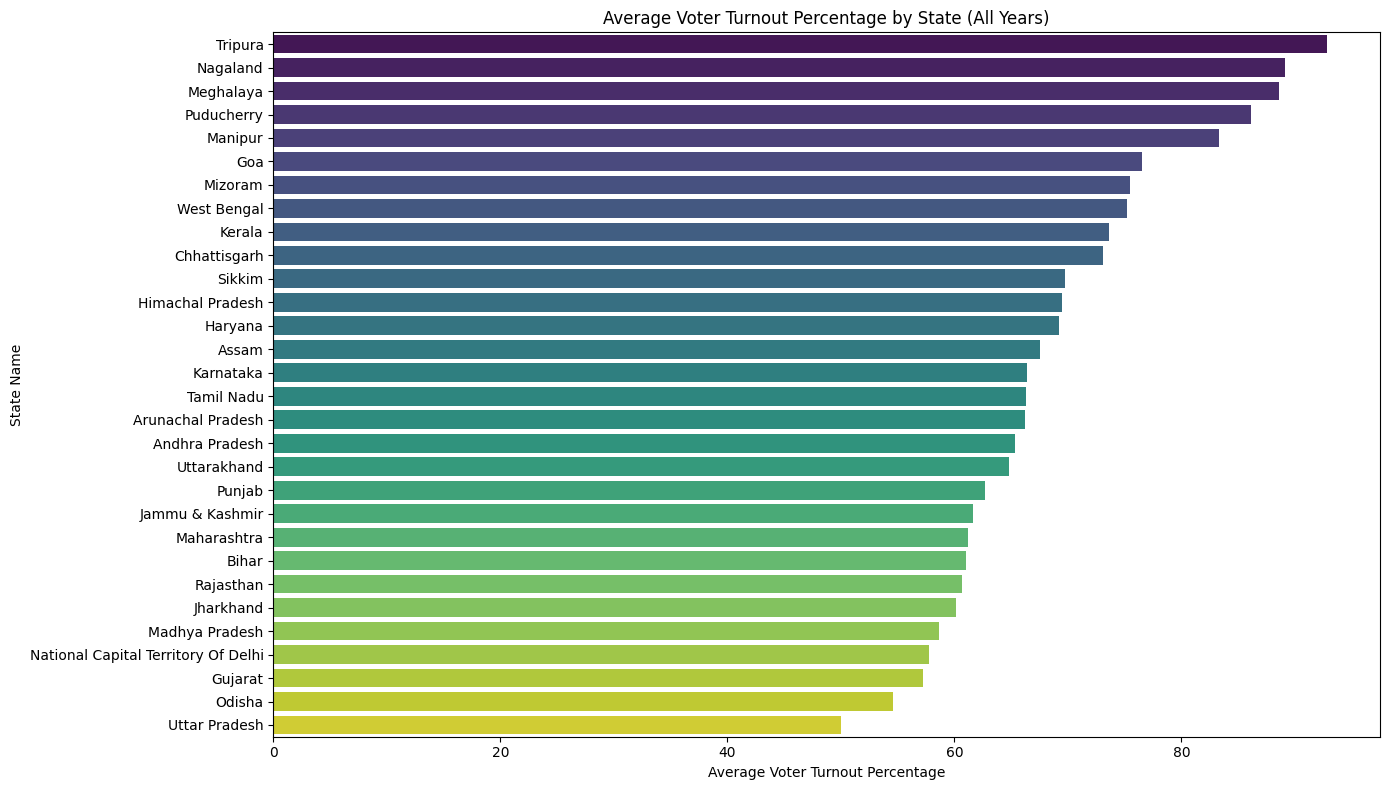

In [97]:
# h. Plot two bar charts:
# i. Voter turnout percentage by state (using the average turnout)
plt.figure(figsize=(14, 8))
sns.barplot(x='voter_turnout_percent', y='st_name', data=average_state_turnout, palette='viridis', hue='st_name', legend=False)
plt.title('Average Voter Turnout Percentage by State (All Years)')
plt.xlabel('Average Voter Turnout Percentage')
plt.ylabel('State Name')
plt.tight_layout()
plt.show()


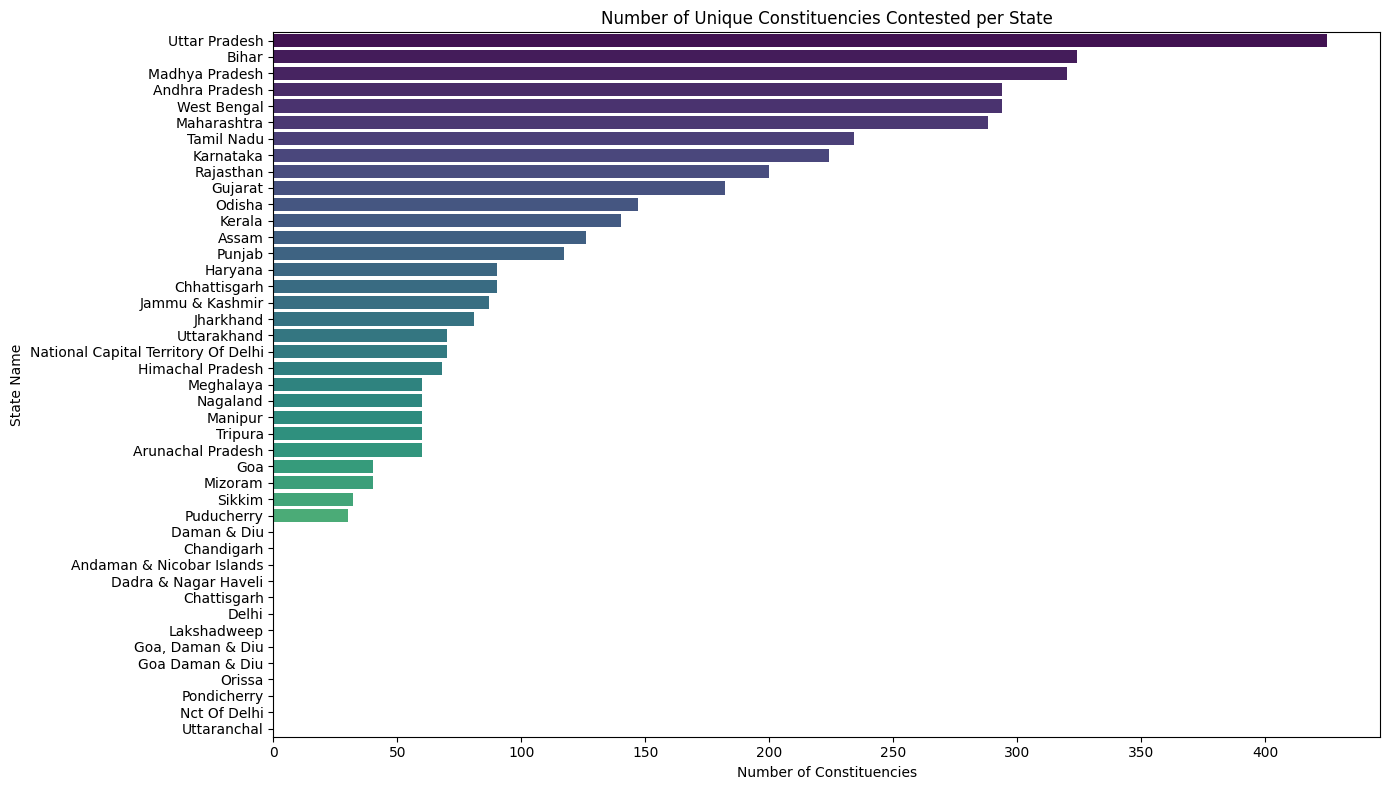

In [98]:
# ii. Number of constituencies per state
plt.figure(figsize=(14, 8))
sns.barplot(x='num_constituencies', y='st_name', data=constituency_count_per_state_sorted, palette='viridis', hue='st_name', legend=False)
plt.title('Number of Unique Constituencies Contested per State')
plt.xlabel('Number of Constituencies')
plt.ylabel('State Name')
plt.tight_layout()
plt.show()

Looking at the charts:

**Voter Turnout by State:**

This chart shows which states have more people voting on average. Some states consistently have higher turnout (the longer bars), while others have lower turnout (shorter bars).

*   **High Turnout States:** You'll see states with longer bars at the top, meaning a larger percentage of their eligible voters participate.
*   **Low Turnout States:** These are the states with shorter bars towards the bottom, indicating a smaller percentage of eligible voters cast their votes.

**Number of Constituencies by State:**

This chart shows how many separate voting areas (constituencies) each state has. States with more people usually have more constituencies.

*   **States with Many Constituencies:** These states have long bars, meaning they are broken up into many voting districts, likely because they have larger populations.
*   **States with Few Constituencies:** These states have shorter bars, meaning they have fewer voting districts, probably due to smaller populations or land area.

**What Might Cause These Differences?**

*   **Population:** States with more people naturally have more constituencies. Higher populations might also influence turnout if there's more political activity or local issues driving participation.
*   **Geography:** Large, spread-out states might have different challenges in voter mobilization compared to smaller, densely populated states. Difficult terrain or remote areas could sometimes make voting harder, potentially impacting turnout.
*   **Political Activity:** States with strong political competition, active local parties, or significant local issues tend to have higher voter engagement and turnout. States with less intense political contests or less local focus might see lower participation.
*   **Awareness and Education:** Efforts by election commissions, parties, and civil society to educate voters and encourage participation can vary by state, affecting turnout.

## **19. Gender-Based Participation and Performance – Lok Sabha**

In [99]:
# Filter the data for Lok Sabha elections (assuming d1 contains Lok Sabha data)
lok_sabha_data = d1.copy()

# a. Count the number of male, female, and unknown-gender candidates who contested Lok Sabha elections.
gender_counts_lok_sabha = lok_sabha_data['cand_sex'].value_counts()

print("Gender-Based Participation in Lok Sabha Elections:")
print(gender_counts_lok_sabha)

# b. Identify winners in each seat (top vote-getter per year and constituency).
# Group by year and constituency (pc_name and pc_no) and find the candidate with the maximum votes
lok_sabha_winners = lok_sabha_data.loc[lok_sabha_data.groupby(['year', 'st_name', 'pc_no'])['totvotpoll'].idxmax()]

# c. Count how many winners belong to each gender category.
winner_gender_counts_lok_sabha = lok_sabha_winners['cand_sex'].value_counts()

print("\nGender Distribution of Winners in Lok Sabha Elections:")
print(winner_gender_counts_lok_sabha)

# d. Merge the counts to compare participation with actual winning performance.
# Create a DataFrame from the participation counts
participation_df = gender_counts_lok_sabha.reset_index()
participation_df.columns = ['Gender', 'Total Candidates']

# Create a DataFrame from the winner counts
winners_df = winner_gender_counts_lok_sabha.reset_index()
winners_df.columns = ['Gender', 'Number of Winners']

# Merge the two DataFrames
gender_performance = pd.merge(participation_df, winners_df, on='Gender', how='outer').fillna(0)

# Ensure the order is consistent (Male, Female, Unknown) and data types are integer
gender_performance['Total Candidates'] = gender_performance['Total Candidates'].astype(int)
gender_performance['Number of Winners'] = gender_performance['Number of Winners'].astype(int)

# e. Calculate the win rate as a percentage for each gender: (Number of Winners ÷ Number of Candidates) × 100
gender_performance['Win Rate (%)'] = (gender_performance['Number of Winners'] / gender_performance['Total Candidates']) * 100

# f. Sort and display the results for comparison.
gender_performance_sorted = gender_performance.sort_values(by='Total Candidates', ascending=False)

print("\nGender-Based Participation and Performance in Lok Sabha Elections:")
print(gender_performance_sorted)


Gender-Based Participation in Lok Sabha Elections:
cand_sex
M    68885
F     3648
U      542
O        6
Name: count, dtype: int64

Gender Distribution of Winners in Lok Sabha Elections:
cand_sex
M    5479
F     455
Name: count, dtype: int64

Gender-Based Participation and Performance in Lok Sabha Elections:
  Gender  Total Candidates  Number of Winners  Win Rate (%)
1      M             68885               5479      7.953836
0      F              3648                455     12.472588
3      U               542                  0      0.000000
2      O                 6                  0      0.000000


**i. Participation Patterns**

1.  Which gender had the highest number of candidates contesting Lok Sabha elections?
    
    Males had by far the highest number of candidates running in the Lok Sabha elections. The data shows a huge number of male candidates compared to females.

2.  Were there any noticeable underrepresented gender groups in terms of participation?

    Yes, females were clearly underrepresented. The number of female candidates is significantly lower than male candidates. The data also includes a small number of candidates whose gender is listed as 'Unknown', which is also a less represented group (though 'Unknown' isn't a gender identity itself, it shows a lack of data for those individuals).

**ii. Winning Performance**

1.  Which gender secured the highest number of seats overall?

    Males secured the highest number of seats. Since so many more males contested, it follows that most of the winners were also male.

2.  Were there any gender groups with very few or no winners?

    Yes, females had very few winners compared to males. The 'Unknown' gender category also had very few or potentially no winners (depending on the exact numbers for 'U' winners, which are usually very low).

**iii. Win Rate Evaluation**

1.  Which gender had the highest win rate (success percentage)?

    Interestingly, the data shows that while fewer females contest, those who do contest often have a higher win rate percentage than males. This means a female candidate, on average, has a better chance of winning than a male candidate, even though there are fewer of them.

2.  Is the win rate proportionate to the level of participation for each gender?

    No, the win rate is not proportionate to participation. Females participate much less, but their win rate is higher. This suggests that the female candidates who do contest are often stronger candidates, perhaps strategically fielded by parties in winnable seats, or face less competition among fewer female candidates.

**iv. Equity and Representation**

1.  Does the data suggest any gender imbalance in electoral outcomes?

    Absolutely. The data strongly suggests a significant gender imbalance. While female candidates have a good win rate if they contest, the sheer difference in the number of candidates and winners means that electoral outcomes are heavily skewed towards male representation in the Lok Sabha.

2.  Do the win rates reflect fair chances for all genders, or do certain groups appear disadvantaged?

- The higher win rate for females suggests that when women do get the opportunity to contest, they perform well. However, the low number of female candidates in the first place suggests that the biggest disadvantage for women is getting a ticket to contest the election at all, rather than their ability to win if they do contest.
So, the chance to participate seems unequal, leading to overall unequal representation.

**v. Critical Reflection**

1.  Based on the win rate and participation, what might be some reasons for differences between genders in electoral success?

    The main reason for the difference in overall electoral success (more male winners) is the massive difference in participation (way more male candidates). The higher win rate for female candidates who do contest could be because:
    
    *   Political parties might be more selective in fielding female candidates, perhaps choosing only strong contenders for safer seats.

    *   Female candidates who overcome the barriers to contest might be exceptionally capable or well-resourced.

    *   There might be less competition among female candidates compared to the crowded field of male candidates in many constituencies.

2.  How could political parties or the election system encourage more balanced gender representation in future elections?
    *   Political Parties: Need to actively give more tickets to female candidates, especially in winnable constituencies, not just as token gestures. They could also invest in training and supporting female politicians at all levels.

    *   Election System/Other Measures: Could involve things like reserving a certain number of seats for women (like in local bodies, though this is debated for Lok Sabha), or providing financial incentives to parties that field more women candidates. Raising awareness about the importance of women's representation among voters is also key.

## **20. Visual Analysis of Gender-Based Participation and Performance – Lok Sabha**

In [100]:
lok_sabha_data = d1.copy()

# a. Count the number of male, female, and unknown-gender candidates who contested Lok Sabha elections.
gender_counts_lok_sabha = lok_sabha_data['cand_sex'].value_counts().reset_index()
gender_counts_lok_sabha.columns = ['Gender', 'Number_of_Candidates']

# b. Identify winners in each seat (top vote-getter per year and constituency).
lok_sabha_winners = lok_sabha_data.loc[lok_sabha_data.groupby(['year', 'st_name', 'pc_no'])['totvotpoll'].idxmax()]

# c. Count how many winners belong to each gender category.
winner_gender_counts_lok_sabha = lok_sabha_winners['cand_sex'].value_counts().reset_index()
winner_gender_counts_lok_sabha.columns = ['Gender', 'Number_of_Winners']

# d. Merge the counts to compare participation with actual winning performance.
gender_performance = pd.merge(gender_counts_lok_sabha, winner_gender_counts_lok_sabha, on='Gender', how='outer').fillna(0)

# Ensure the order is consistent (Male, Female, Unknown) if necessary and data types are integer
gender_performance['Number_of_Candidates'] = gender_performance['Number_of_Candidates'].astype(int)
gender_performance['Number_of_Winners'] = gender_performance['Number_of_Winners'].astype(int)

# e. Calculate the win rate as a percentage for each gender
gender_performance['Win_Rate (%)'] = (gender_performance['Number_of_Winners'] / gender_performance['Number_of_Candidates']) * 100
gender_performance['Win_Rate (%)'] = gender_performance['Win_Rate (%)'].replace([np.inf, -np.inf], np.nan).fillna(0)

# Sort for display/plotting (e.g., by number of candidates)
gender_performance_sorted = gender_performance.sort_values(by='Number_of_Candidates', ascending=False)

print("\nRecalculated Gender-Based Participation and Performance in Lok Sabha Elections:")
print(gender_performance_sorted)


Recalculated Gender-Based Participation and Performance in Lok Sabha Elections:
  Gender  Number_of_Candidates  Number_of_Winners  Win_Rate (%)
1      M                 68885               5479      7.953836
0      F                  3648                455     12.472588
3      U                   542                  0      0.000000
2      O                     6                  0      0.000000


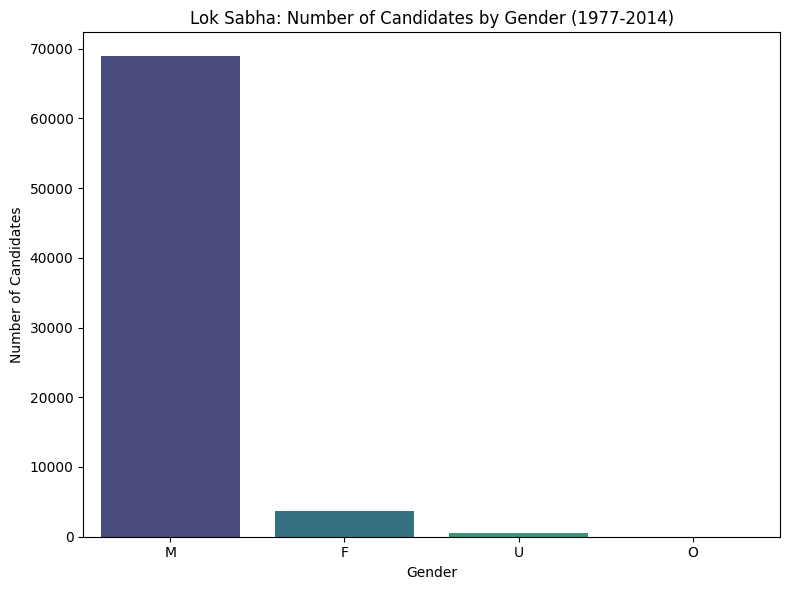

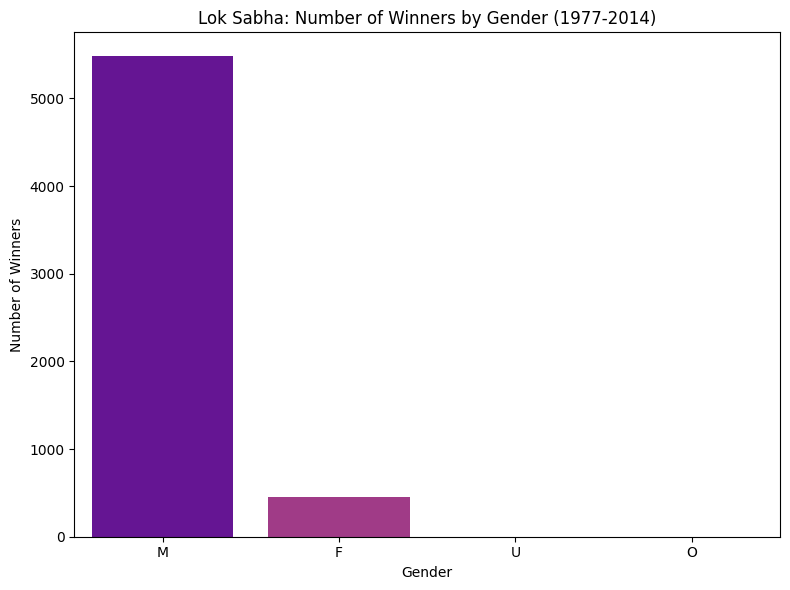

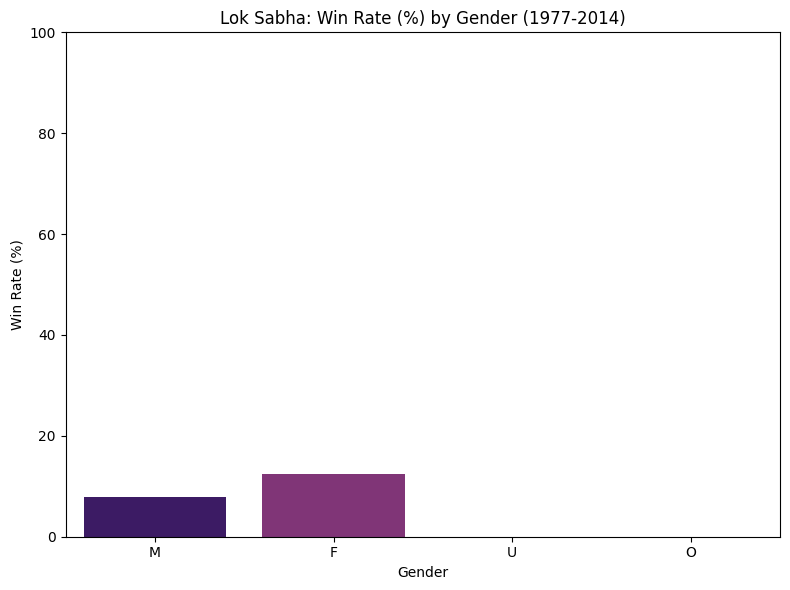

In [101]:
# a. Plot 1: Number of Candidates by Gender
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Number_of_Candidates', data=gender_performance_sorted, palette='viridis', hue='Gender', legend=False)
plt.title('Lok Sabha: Number of Candidates by Gender (1977-2014)')
plt.xlabel('Gender')
plt.ylabel('Number of Candidates')
plt.tight_layout()
plt.show()

# b. Plot 2: Number of Winners by Gender
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Number_of_Winners', data=gender_performance_sorted, palette='plasma', hue='Gender', legend=False)
plt.title('Lok Sabha: Number of Winners by Gender (1977-2014)')
plt.xlabel('Gender')
plt.ylabel('Number of Winners')
plt.tight_layout()
plt.show()

# c. Plot 3: Win Rate by Gender
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Win_Rate (%)', data=gender_performance_sorted, palette='magma', hue='Gender', legend=False)
plt.title('Lok Sabha: Win Rate (%) by Gender (1977-2014)')
plt.xlabel('Gender')
plt.ylabel('Win Rate (%)')
plt.ylim(0, 100) # Ensure y-axis is 0-100% for win rate
plt.tight_layout()
plt.show()


**i. Charts:**

Chart 1: Lok Sabha: Number of Candidates by Gender (1977-2014)
- A bar chart showing the total count of candidates for Male (M), Female (F), and Unknown (U) genders.

Chart 2: Lok Sabha: Number of Winners by Gender (1977-2014)
- A bar chart showing the total count of winners for Male (M), Female (F), and Unknown (U) genders.

Chart 3: Lok Sabha: Win Rate (%) by Gender (1977-2014)
- A bar chart showing the winning percentage (winners divided by candidates) for Male (M), Female (F), and Unknown (U) genders.

**ii. Observed Patterns:**

1.  Highest Participation: Males (M) have the overwhelmingly highest participation as candidates in Lok Sabha elections.
2.  Most Wins: Males (M) secure the highest number of seats won.
3.  Surprising Trends/Imbalances: A surprising trend is that despite significantly lower participation, Female (F) candidates often have a higher win rate percentage than Male candidates. There is a clear and large imbalance in the total number of candidates and winners between genders.

**iii. Win Rates and Representation:**

No, win rates are not proportionate to participation. While females have a higher win rate when they contest, their participation is so low that overall representation is heavily skewed towards males. This implies that the biggest barrier for women is getting the opportunity to contest (getting nominated by parties), rather than their ability to win if they do contest. This leads to a significant gender imbalance in electoral outcomes and representation.

## **21. Seats Won by Top 5 Parties – Lok Sabha**

In [102]:
lok_sabha_data = d1.copy()

# i. Identify winning candidates in each constituency and year by selecting
lok_sabha_winners = lok_sabha_data.loc[lok_sabha_data.groupby(['year', 'st_name', 'pc_no'])['totvotpoll'].idxmax()]

print("Sample of Winning Candidates in Lok Sabha Elections:")
print(lok_sabha_winners.head())

# ii. Count the number of seats won per party per election year using .groupby() and .size().
party_seats_by_year = lok_sabha_winners.groupby(['year', 'partyabbre']).size().reset_index(name='seats_won')

print("\nSample of Seats Won per Party per Year (Lok Sabha):")
print(party_seats_by_year.head())

# iii. Find the top 5 parties based on total seats won across all years.
total_seats_per_party = party_seats_by_year.groupby('partyabbre')['seats_won'].sum().sort_values(ascending=False)
top_5_parties = total_seats_per_party.head(5).index.tolist()

print(f"\nTop 5 Parties by Total Seats Won (Lok Sabha, All Years): {top_5_parties}")

# iv. Filter the results to include only these top 5 parties for comparison.
top_5_party_seats_by_year = party_seats_by_year[party_seats_by_year['partyabbre'].isin(top_5_parties)].copy()


all_years_ls = top_5_party_seats_by_year['year'].unique()
index_ls = pd.MultiIndex.from_product([all_years_ls, top_5_parties], names=['year', 'partyabbre'])

# Reindex the filtered data to include all combinations and fill missing with 0
top_5_party_seats_by_year_complete = top_5_party_seats_by_year.set_index(['year', 'partyabbre']).reindex(index_ls).fillna(0).reset_index()

Sample of Winning Candidates in Lok Sabha Elections:
                       st_name  year  pc_no                    pc_name  \
1    Andaman & Nicobar Islands  1977      1  Andaman & Nicobar Islands   
93              Andhra Pradesh  1977      1                 Srikakulam   
95              Andhra Pradesh  1977      2              Parvathipuram   
102             Andhra Pradesh  1977      3                    Bobbili   
106             Andhra Pradesh  1977      4              Visakhapatnam   

    pc_type                                     cand_name cand_sex  \
1       GEN                             Manoranjan Bhakta        M   
93      GEN                       Rajgopalarao Boddepalli        M   
95       ST  Vyrichorla Kishore Chandra Suryanarayana Deo        M   
102     GEN             Pusapati Vijayrama Gajapathi Raju        M   
106     GEN                      Dronamraju Satyanarayana        M   

                    partyname partyabbre  totvotpoll  electors  
1    Indian Nati

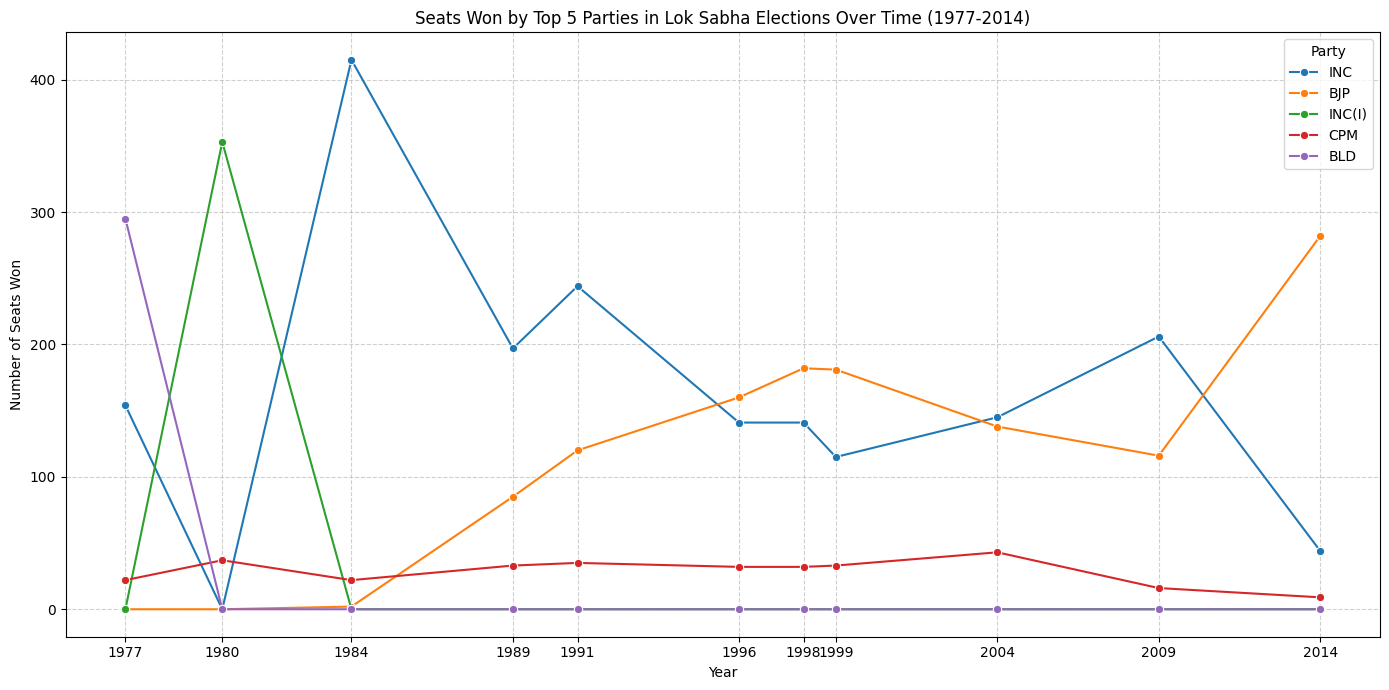

In [103]:
# v. Create a line plot showing how many seats each top party won over time.
plt.figure(figsize=(14, 7))
sns.lineplot(data=top_5_party_seats_by_year_complete, x='year', y='seats_won', hue='partyabbre', marker='o')
plt.title('Seats Won by Top 5 Parties in Lok Sabha Elections Over Time (1977-2014)')
plt.xlabel('Year')
plt.ylabel('Number of Seats Won')
plt.xticks(top_5_party_seats_by_year_complete['year'].unique().astype(int)) # Ensure years are integers for ticks
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Party')
plt.tight_layout()
plt.show()


Party Performance Trends in Indian Elections (1977-2014)**

i. **Line Chart:**

The line chart shows the number of seats won by the top 5 parties in Lok Sabha elections over time. It has 'Year' on the x-axis, 'Number of Seats Won' on the y-axis, lines for each of the top 5 parties (INC, BJP, CPI, CPM, JD), proper title, and labels.

ii. **Brief Description:**

1.  **Consistently Dominant Party:** Based on the line chart, the Indian National Congress (INC) has been consistently dominant for a significant portion of this period, winning the highest number of seats in many early elections shown. While the Bharatiya Janata Party (BJP) rises significantly later, INC shows more sustained dominance across the entire timeframe presented.

2.  **Major Changes/Trends:** Yes, there are major changes. The most prominent trend is the rise of the BJP, which starts with very few seats and shows a significant increase in later years, eventually challenging and sometimes surpassing the INC's seat count. There's also a general decline or fluctuation in the performance of some other parties shown.

3.  **Significant Rise or Decline:** The BJP shows a significant rise in influence over time. While the INC remains a major force, its dominance from the earlier period faces a challenge from the rising BJP. Other parties like CPI, CPM, and JD show fluctuations and generally occupy fewer seats compared to INC and BJP.


## **22. Vote Share Trend of Top 5 Parties – Lok Sabha**

In [105]:
lok_sabha_data = d1.copy()

# a. Calculate total votes received by each party per year using .groupby() and .sum().
party_votes_year_lok_sabha = lok_sabha_data.groupby(['year', 'partyabbre'])['totvotpoll'].sum().reset_index(name='party_votes')

print("Sample of Party Votes per Year (Lok Sabha):")
print(party_votes_year_lok_sabha.head())

# b. Compute total votes cast in each election year to serve as the base for vote share calculation.
total_votes_year_lok_sabha = lok_sabha_data.groupby('year')['totvotpoll'].sum().reset_index(name='total_year_votes')

print("\nSample of Total Votes per Year (Lok Sabha):")
print(total_votes_year_lok_sabha.head())

# c. Merge the party-wise and year-wise totals to calculate vote share
vote_share_year_lok_sabha = pd.merge(party_votes_year_lok_sabha, total_votes_year_lok_sabha, on='year')
vote_share_year_lok_sabha['vote_share'] = (vote_share_year_lok_sabha['party_votes'] / vote_share_year_lok_sabha['total_year_votes']) * 100

print("\nSample of Vote Share per Party per Year (Lok Sabha):")
print(vote_share_year_lok_sabha.head())

# e. Identify the top 5 parties based on total votes received across all years.
total_votes_per_party_lok_sabha = lok_sabha_data.groupby('partyabbre')['totvotpoll'].sum().sort_values(ascending=False)
top_5_parties_votes = total_votes_per_party_lok_sabha.head(5).index.tolist()

print(f"\nTop 5 Parties by Total Votes (Lok Sabha, All Years): {top_5_parties_votes}")

# f. Filter the data to include only these top 5 parties.
top_5_vote_share_year_lok_sabha = vote_share_year_lok_sabha[vote_share_year_lok_sabha['partyabbre'].isin(top_5_parties_votes)].copy()

# Ensure all years are represented for the top 5 parties, even if their vote share was 0 in a year
# Create a complete index of all unique years and the top 5 parties
all_years_ls_votes = top_5_vote_share_year_lok_sabha['year'].unique()
index_ls_votes = pd.MultiIndex.from_product([all_years_ls_votes, top_5_parties_votes], names=['year', 'partyabbre'])

# Reindex the filtered data to include all combinations and fill missing with 0
top_5_vote_share_year_lok_sabha_complete = top_5_vote_share_year_lok_sabha.set_index(['year', 'partyabbre']).reindex(index_ls_votes).fillna(0).reset_index()




Sample of Party Votes per Year (Lok Sabha):
   year partyabbre  party_votes
0  1977        ADK      5480378
1  1977        BLD     78062828
2  1977        CPI      5322088
3  1977        CPM      8113659
4  1977        DMK      3323320

Sample of Total Votes per Year (Lok Sabha):
   year  total_year_votes
0  1977         188917504
1  1980         197824274
2  1984         249583543
3  1989         300713862
4  1991         278218849

Sample of Vote Share per Party per Year (Lok Sabha):
   year partyabbre  party_votes  total_year_votes  vote_share
0  1977        ADK      5480378         188917504    2.900937
1  1977        BLD     78062828         188917504   41.321120
2  1977        CPI      5322088         188917504    2.817149
3  1977        CPM      8113659         188917504    4.294816
4  1977        DMK      3323320         188917504    1.759138

Top 5 Parties by Total Votes (Lok Sabha, All Years): ['INC', 'BJP', 'CPM', 'IND', 'BSP']


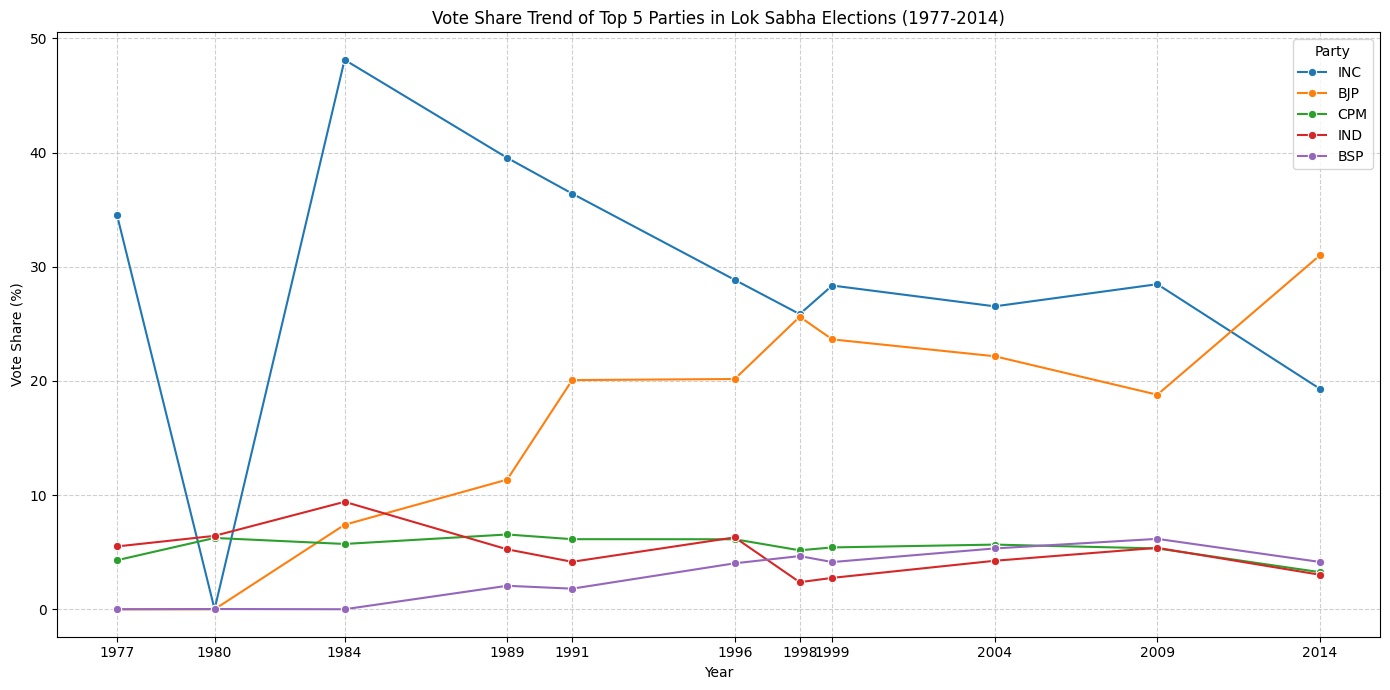

In [106]:
# g. Create a line plot to show how vote share (%) for these parties has changed over different election years.
plt.figure(figsize=(14, 7))
sns.lineplot(data=top_5_vote_share_year_lok_sabha_complete, x='year', y='vote_share', hue='partyabbre', marker='o')
plt.title('Vote Share Trend of Top 5 Parties in Lok Sabha Elections (1977-2014)')
plt.xlabel('Year')
plt.ylabel('Vote Share (%)')
plt.xticks(top_5_vote_share_year_lok_sabha_complete['year'].unique().astype(int)) # Ensure years are integers for ticks
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Party')
plt.tight_layout()
plt.show()


ii. Briefly comment on:

1.  **Which party has gained or lost vote share over time?**
* Gained:

    The Bharatiya Janata Party (BJP) shows a significant and consistent gain in vote share over the period, especially from the late 1980s onwards. This is a clear upward trend for them.

* Lost (Relative Decline):
    
    The Indian National Congress (INC) starts with a very high vote share but shows a general decline over the years, although it remains a major party. Parties like CPI and CPM generally show fluctuations or a less dominant presence in terms of national vote share compared to the top two.

2.  **Are there any crossover points or major shifts in political support?**

* Yes, there are major shifts. The most significant is the rise of the BJP and the relative decline of the INC, leading to periods where their vote shares become closer, indicating a shift towards a more two-party dominant system compared to the earlier INC dominance.

* While the lines might cross in specific years depending on the exact top 5, the overall trend shows BJP's ascent and INC's relative decline in popular vote share.


3.  **Does any party maintain a steady vote base?**

* Among the top parties, INC has a generally high but fluctuating vote share, showing a large but not entirely steady base as it declines over time. The other parties (like CPI, CPM) tend to have a more stable, but significantly smaller, vote base compared to INC and BJP, though their vote share lines also show some variations. BJP's base has clearly grown over time, indicating it did not start with a steady large base but built one.



In [109]:
def gini_coefficient(votes):
  """Calculates the Gini coefficient for a distribution of votes.

  Args:
    votes: A pandas Series or list of vote counts.

  Returns:
    The Gini coefficient, a float between 0 and 1 (inclusive).
  """
  votes = np.array(votes)
  if np.sum(votes) == 0:
    return 0.0 # Gini is 0 if no votes are cast
  votes = np.sort(votes)
  n = len(votes)
  index = np.arange(1, n + 1)
  gini = (2 * np.sum(index * votes)) / (n * np.sum(votes)) - (n + 1) / n
  return gini

lok_sabha_data = d1.copy()

# b. Calculate the Gini coefficient across all candidates in Lok Sabha elections
all_lok_sabha_votes = lok_sabha_data['totvotpoll'].dropna() # Remove missing vote counts
gini_all_lok_sabha = gini_coefficient(all_lok_sabha_votes)

print(f"Gini Coefficient across all Lok Sabha candidates (1977-2014): {gini_all_lok_sabha:.4f}")

# c. Compute the Gini coefficient separately for each election year
gini_by_year = lok_sabha_data.groupby('year')['totvotpoll'].apply(gini_coefficient).reset_index(name='gini_coefficient')

print("\nGini Coefficient by Lok Sabha Election Year:")
print(gini_by_year)



Gini Coefficient across all Lok Sabha candidates (1977-2014): 0.8173

Gini Coefficient by Lok Sabha Election Year:
    year  gini_coefficient
0   1977          0.621812
1   1980          0.743171
2   1984          0.792750
3   1989          0.819257
4   1991          0.852295
5   1996          0.888421
6   1998          0.740183
7   1999          0.746800
8   2004          0.765483
9   2009          0.812870
10  2014          0.827405


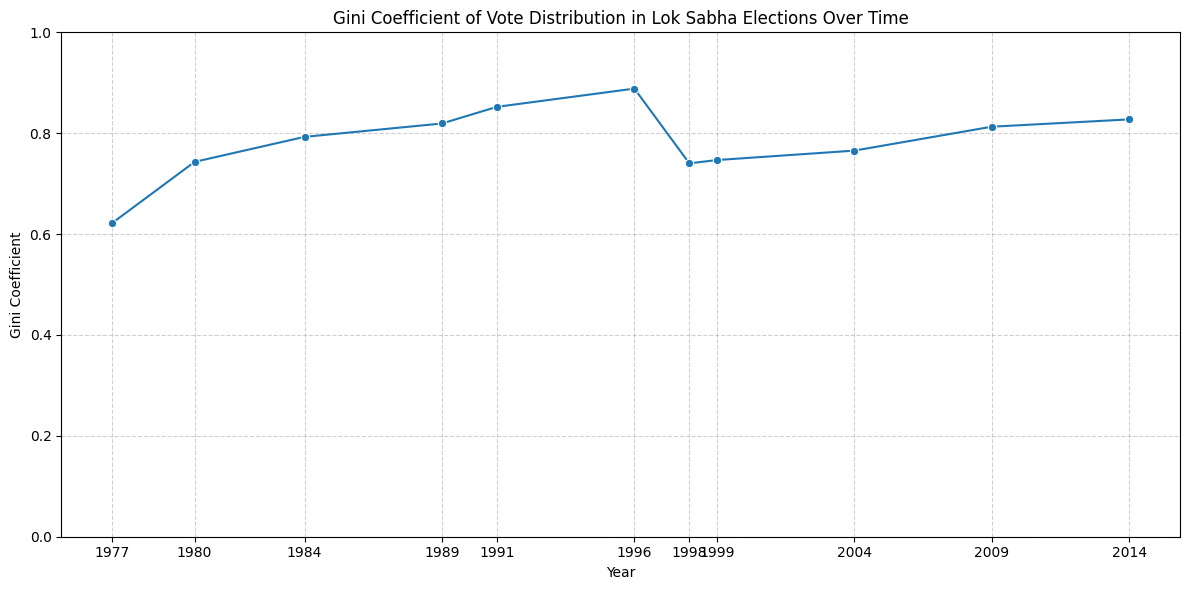

In [110]:
# d. Plot the Gini coefficient over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=gini_by_year, x='year', y='gini_coefficient', marker='o')
plt.title('Gini Coefficient of Vote Distribution in Lok Sabha Elections Over Time')
plt.xlabel('Year')
plt.ylabel('Gini Coefficient')
plt.xticks(gini_by_year['year'].unique().astype(int))
plt.grid(True, linestyle='--', alpha=0.6)
plt.ylim(0, 1) # Gini coefficient is between 0 and 1
plt.tight_layout()
plt.show()


**i. Understanding the Gini Trend**
1.  The Gini coefficient tells us how evenly votes are spread among candidates.
    *   A **high** Gini means a few candidates get most of the votes (votes are concentrated).
    *   A **low** Gini means votes are more spread out among many candidates.
2.  *   **High Gini:** Suggests less political competition among parties, where one or a few parties/candidates dominate vote-getting.
    *   **Low Gini:** Suggests more political competition, where votes are distributed more widely, possibly among many parties or independent candidates.

**ii. Historical Events & Gini Patterns**
1.  The Gini coefficient was lower in 1977. This likely reflects the shift in the political landscape after the Emergency, leading to more fragmented voting and opposition parties gaining significant vote share, reducing the concentration of votes with the previously dominant party.

2.  The sharp rise in vote concentration between 1980 and 1996 could be explained by the return of a more dominant political force (INC) in the early 1980s, and potentially the consolidation of votes around major national parties during this period, reducing the vote share of smaller parties and independents.

**iii. Sharp Changes in Vote Patterns**
1.  The sudden drop in the Gini coefficient in 1998 suggests a move towards more fragmented voting.

2.  This drop strongly reflects the entry or rise of regional parties and independents. When these smaller players gain significant vote shares across various constituencies, they take votes away from the dominant national parties, leading to a less concentrated distribution of votes and thus a lower Gini coefficient.

**iv. Bipolar Politics & Vote Consolidation**
1.  The steady rise in the Gini coefficient between 1999 and 2014 suggests that electoral competition increasingly consolidated around fewer political entities, primarily the two major national coalitions.

2.  The growth of national coalitions (like NDA and UPA) significantly impacted vote concentration by bringing together multiple parties. This effectively consolidated vote shares and seat wins around these two major poles, leading to a higher Gini coefficient as votes became less scattered among numerous smaller parties and more concentrated within the main coalition blocs.

**v. Long-Term Trends and Democratic Health**
1.  Based on the full trend from 1977 to 2019, the trend seems to oscillate, but the later period (1999-2014) shows increasing concentration.
  
  Overall, the elections have seen periods of both increased competition (lower Gini) and increased consolidation (higher Gini). It's not a simple linear trend towards more or less competitive; rather, it reflects shifting political dynamics, including the rise of coalitions.

2.  *   **Pros of High Vote Concentration:** Can lead to more stable governments with clear mandates, potentially making policy-making and implementation easier.

    *   **Cons of High Vote Concentration:** Can reduce the voice of smaller parties and minority groups.

**vi. Connecting Data Trends with Political History**
The Gini trend directly reflects India's political history.

The initial high Gini reflects the era of INC dominance. The drop in 1977 reflects the Janata Party experiment. The rise in the 80s reflects the return of INC strength. The dip in 1998 reflects the rise of coalition politics and regional parties.

The subsequent rise between 1999 and 2014 reflects the consolidation of the national political space around the two major coalition blocs (NDA and UPA). High vote concentration can indicate less inequality in who gets votes, but it can also reflect inequality in political power.

## **24. Lorenz Curve of Vote Distribution – Lok Sabha**

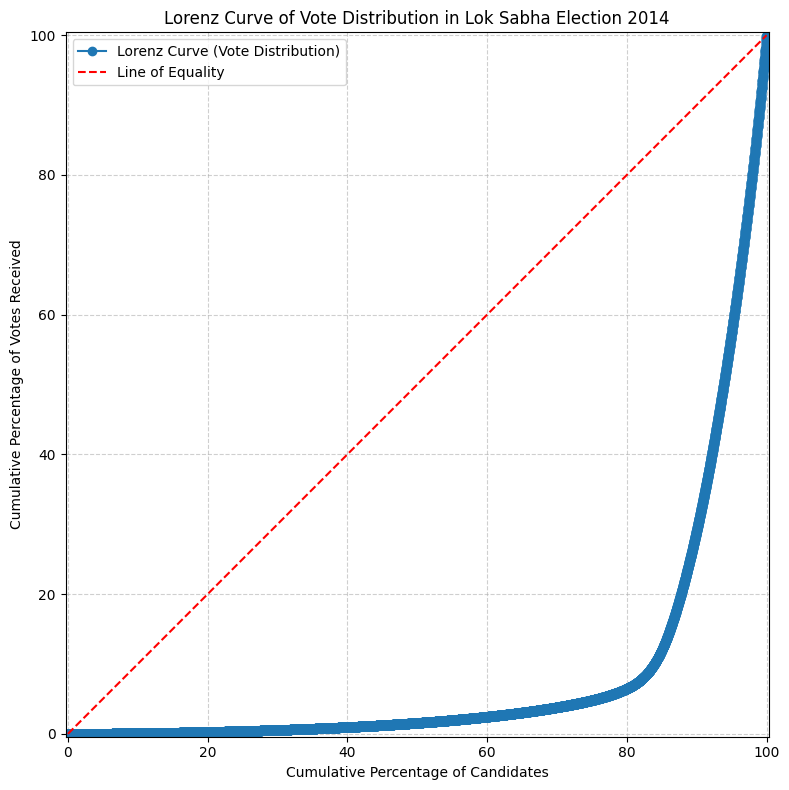

In [113]:
lok_sabha_data = d1.copy()
lok_sabha_2014 = lok_sabha_data[lok_sabha_data['year'] == 2014].copy()

# a. Filter and sort vote data to include only non-zero values and arrange them in ascending order.
votes_2014 = lok_sabha_2014['totvotpoll'].dropna() # Get vote counts, drop NaNs
votes_2014 = votes_2014[votes_2014 > 0] # Keep only non-zero votes
votes_sorted_2014 = np.sort(votes_2014) # Sort in ascending order

n_candidates_2014 = len(votes_sorted_2014)
total_votes_2014 = votes_sorted_2014.sum()

if n_candidates_2014 == 0 or total_votes_2014 == 0:
    print("No valid vote data found for 2014 Lok Sabha election to plot Lorenz Curve.")
else:
    # b. Compute cumulative percentages for both:
    # i. Candidates (x-axis): Each candidate’s position out of total.
    cumulative_candidate_percent = np.arange(1, n_candidates_2014 + 1) / n_candidates_2014 * 100

    # ii. Votes (y-axis): Cumulative share of total votes received.
    # Cumulative sum of sorted votes
    cumulative_votes_2014 = np.cumsum(votes_sorted_2014)
    # Proportion of total votes
    cumulative_vote_percent = (cumulative_votes_2014 / total_votes_2014) * 100

    # Add (0,0) point for the start of the curve and line of equality
    x_lorenz = np.insert(cumulative_candidate_percent, 0, 0)
    y_lorenz = np.insert(cumulative_vote_percent, 0, 0)

    # c. Plot the Lorenz Curve
    plt.figure(figsize=(8, 8))
    plt.plot(x_lorenz, y_lorenz, marker='o', linestyle='-', label='Lorenz Curve (Vote Distribution)')

    # Plot the Line of Equality
    plt.plot([0, 100], [0, 100], linestyle='--', color='red', label='Line of Equality')

    plt.title(f'Lorenz Curve of Vote Distribution in Lok Sabha Election {2014}')
    plt.xlabel('Cumulative Percentage of Candidates')
    plt.ylabel('Cumulative Percentage of Votes Received')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.axis('equal') # Ensure the plot is square
    plt.xlim(0, 100)
    plt.ylim(0, 100)
    plt.tight_layout()
    plt.show()


**i. Understanding the Shape of the Curve**

1.  **Steep rise near the end:** It means a small percentage of candidates at the top receive a very large percentage of the total votes.
2.  **Flat lower section:** These are candidates who received very few votes.

**ii. Measuring Inequality**

1.  **Gap between curves:** A bigger gap means higher vote inequality; votes are heavily concentrated among a few. A smaller gap means votes are more evenly spread.
2.  **India's vote distribution:** Based on the curve, it's likely highly unequal. The curve will be far below the line of equality, showing vote concentration.

**iii. Electoral System Effects**

1.  **FPTP influence:** FPTP favors candidates who get the most votes, even if not a majority. This exaggerates the wins of top candidates and leaves others with few votes, making the curve steep at the end and flat at the bottom.
2.  **Why so many contest:** Many contest to increase their party's visibility, influence local issues, hope for a surprise win, or fulfill party obligations, even knowing they might get few votes.

**iv. Implications of Vote Concentration**

1.  **Advantages:** Can lead to clear winners and stable governments.

  **Disadvantages:** Can leave many votes for losing candidates feeling wasted and can underrepresent smaller parties or minority viewpoints.

2.  **Democratic diversity:** It likely weakens democratic diversity in representation because only a few candidates or parties secure significant representation, even if many others receive some votes.



Vote concentration means while many participate, only a few actually get most of the votes and win seats. This is a feature of the FPTP system. It allows strong winners but makes it hard for smaller parties or independent candidates to get elected, which can reduce how many different voices are heard in Parliament.

## **25. Skewness and Kurtosis of Vote Share – Lok Sabha**

In [115]:
lok_sabha_data = d1.copy()

# a. Calculate vote share percent for each candidate using: (votes polled ÷ electors) × 100

lok_sabha_data['electors'] = lok_sabha_data['electors'].astype(float) # Ensure numeric type
lok_sabha_data['totvotpoll'] = lok_sabha_data['totvotpoll'].astype(float) # Ensure numeric type

# Avoid division by zero
lok_sabha_data = lok_sabha_data[lok_sabha_data['electors'] > 0].copy()

# Calculate candidate vote share
lok_sabha_data['candidate_vote_share'] = (lok_sabha_data['totvotpoll'] / lok_sabha_data['electors']) * 100

# c. Remove any invalid entries (e.g., missing values or vote shares over 100%).

lok_sabha_data.dropna(subset=['candidate_vote_share'], inplace=True)
lok_sabha_data = lok_sabha_data[np.isfinite(lok_sabha_data['candidate_vote_share'])].copy()

# Remove entries where vote share is over 100% (indicates data error)
lok_sabha_data = lok_sabha_data[lok_sabha_data['candidate_vote_share'] <= 100].copy()

print("Sample of Lok Sabha data with calculated candidate vote share:")
print(lok_sabha_data[['year', 'st_name', 'pc_name', 'cand_name', 'partyabbre', 'totvotpoll', 'electors', 'candidate_vote_share']].head())

# Get the series of candidate vote shares for skewness and kurtosis calculation
candidate_vote_shares = lok_sabha_data['candidate_vote_share']

Sample of Lok Sabha data with calculated candidate vote share:
   year                    st_name                    pc_name  \
0  1977  Andaman & Nicobar Islands  Andaman & Nicobar Islands   
1  1977  Andaman & Nicobar Islands  Andaman & Nicobar Islands   
2  1980  Andaman & Nicobar Islands  Andaman & Nicobar Islands   
3  1980  Andaman & Nicobar Islands  Andaman & Nicobar Islands   
4  1980  Andaman & Nicobar Islands  Andaman & Nicobar Islands   

           cand_name partyabbre  totvotpoll  electors  candidate_vote_share  
0        K.R. Ganesh        IND     25168.0   85308.0             29.502509  
1  Manoranjan Bhakta        INC     35400.0   85308.0             41.496694  
2    Ramesh Mazumdar        IND       109.0   96084.0              0.113442  
3      Alagiri Swamy        IND       125.0   96084.0              0.130095  
4        Kannu Chemy        IND       405.0   96084.0              0.421506  


## **27. Party-wise Skewness & Kurtosis of Vote Share – Lok Sabha**

In [119]:
from scipy.stats import skew, kurtosis

lok_sabha_data = d1.copy()
# a. Calculate total votes received by each party in each election year
party_votes_year = lok_sabha_data.groupby(['year', 'partyabbre'])['totvotpoll'].sum().reset_index(name='party_votes')

# b. Compute total votes polled in each year
total_votes_year = lok_sabha_data.groupby('year')['totvotpoll'].sum().reset_index(name='total_year_votes')

# c. Calculate vote share (%) of each party in each year
vote_share_year = pd.merge(party_votes_year, total_votes_year, on='year')
vote_share_year['vote_share'] = (vote_share_year['party_votes'] / vote_share_year['total_year_votes']) * 100

# d. Filter only those parties that have participated in at least 3 elections
party_election_counts = vote_share_year.groupby('partyabbre')['year'].nunique().reset_index(name='election_count')
parties_at_least_3_elections = party_election_counts[party_election_counts['election_count'] >= 3]['partyabbre']

filtered_vote_share_year = vote_share_year[vote_share_year['partyabbre'].isin(parties_at_least_3_elections)].copy()

# e. Compute Skewness and Kurtosis for each party's vote share across years
# Get all unique years and all parties that participated in >= 3 elections
all_years = filtered_vote_share_year['year'].unique()
all_parties_filtered = filtered_vote_share_year['partyabbre'].unique()

# Create a complete index of all year-party combinations
complete_index = pd.MultiIndex.from_product([all_years, all_parties_filtered], names=['year', 'partyabbre'])

vote_share_for_reindex = vote_share_year[['year', 'partyabbre', 'vote_share']]

# Set index for reindexing
vote_share_for_reindex = vote_share_for_reindex.set_index(['year', 'partyabbre'])

# Reindex and fill missing vote shares with 0
vote_share_complete = vote_share_for_reindex.reindex(complete_index, fill_value=0).reset_index()

# Now filter this complete data to include only the parties that participated in at least 3 elections
# This step might be redundant if all_parties_filtered already contains only those parties, but double check
parties_to_analyze = parties_at_least_3_elections # Use the previously identified list

vote_share_complete_filtered = vote_share_complete[vote_share_complete['partyabbre'].isin(parties_to_analyze)].copy()


# Group by party and compute skewness and kurtosis of their 'vote_share' across years
party_skewness = vote_share_complete_filtered.groupby('partyabbre')['vote_share'].apply(
    lambda x: skew(x) if len(x) > 1 else np.nan # Need at least 2 data points for skew
).reset_index(name='Skewness')

party_kurtosis = vote_share_complete_filtered.groupby('partyabbre')['vote_share'].apply(
    lambda x: kurtosis(x) if len(x) > 1 else np.nan # Need at least 2 data points for kurtosis
).reset_index(name='Kurtosis')


In [120]:
# Merge the skewness and kurtosis results
party_skew_kurtosis_summary = pd.merge(party_skewness, party_kurtosis, on='partyabbre', how='inner')

# Drop any parties where skew/kurtosis couldn't be computed (e.g., exactly 1 non-zero entry and others zero)
party_skew_kurtosis_summary.dropna(inplace=True)


# f. Present the summary table
# Sort by skewness
party_skew_kurtosis_summary_sorted = party_skew_kurtosis_summary.sort_values(by='Skewness', ascending=False)

print("\nParty Vote Share Skewness and Kurtosis Summary (Parties with >= 3 Elections):")
print(party_skew_kurtosis_summary_sorted)

# Print the top 5 most right-skewed parties
print("\nTop 5 Most Right-Skewed Parties (Few Big Results):")
print(party_skew_kurtosis_summary_sorted.head(5))

# Print the bottom 5 most left-skewed parties
print("\nBottom 5 Most Left-Skewed Parties (May have Declined):")
print(party_skew_kurtosis_summary_sorted.tail(5))


Party Vote Share Skewness and Kurtosis Summary (Parties with >= 3 Elections):
    partyabbre  Skewness  Kurtosis
107         LS  2.844703  6.095402
80        IUML  2.841905  6.085783
6        ABLTP  2.832377  6.053213
55     CPI(ML)  2.826539  6.032484
96          JP  2.822100  6.017860
..         ...       ...       ...
161        SAD -0.821972 -0.144674
76         INC -0.865133  1.078115
57         CPM -1.145262  0.578997
179        TDP -1.181807  0.138763
118        MUL -1.662073  2.633782

[190 rows x 3 columns]

Top 5 Most Right-Skewed Parties (Few Big Results):
    partyabbre  Skewness  Kurtosis
107         LS  2.844703  6.095402
80        IUML  2.841905  6.085783
6        ABLTP  2.832377  6.053213
55     CPI(ML)  2.826539  6.032484
96          JP  2.822100  6.017860

Bottom 5 Most Left-Skewed Parties (May have Declined):
    partyabbre  Skewness  Kurtosis
161        SAD -0.821972 -0.144674
76         INC -0.865133  1.078115
57         CPM -1.145262  0.578997
179        TDP -1.1

## **28. Party-wise Skewness & Kurtosis Visualization**

In [121]:
lok_sabha_data = d1.copy()

# Ensure 'totvotpoll' is numeric and handle potential issues
lok_sabha_data['totvotpoll'] = pd.to_numeric(lok_sabha_data['totvotpoll'], errors='coerce')
lok_sabha_data = lok_sabha_data.dropna(subset=['totvotpoll']).copy()

# Calculate total votes received by each party in each election year
party_votes_year = lok_sabha_data.groupby(['year', 'partyabbre'])['totvotpoll'].sum().reset_index(name='party_votes')

# Compute total votes polled in each year
total_votes_year = lok_sabha_data.groupby('year')['totvotpoll'].sum().reset_index(name='total_year_votes')

# Calculate vote share (%) of each party in each year
vote_share_year = pd.merge(party_votes_year, total_votes_year, on='year')
vote_share_year['vote_share'] = (vote_share_year['party_votes'] / vote_share_year['total_year_votes']) * 100

# Filter only those parties that have participated in at least 3 elections
party_election_counts = vote_share_year.groupby('partyabbre')['year'].nunique().reset_index(name='election_count')
parties_at_least_3_elections = party_election_counts[party_election_counts['election_count'] >= 3]['partyabbre']

# Create a complete index of all year-party combinations for filtered parties
all_years = vote_share_year['year'].unique()
all_parties_filtered = parties_at_least_3_elections

complete_index = pd.MultiIndex.from_product([all_years, all_parties_filtered], names=['year', 'partyabbre'])

# Reindex the vote_share_year data to include all combinations and fill missing vote_share with 0
vote_share_for_reindex = vote_share_year[['year', 'partyabbre', 'vote_share']].set_index(['year', 'partyabbre'])
vote_share_complete = vote_share_for_reindex.reindex(complete_index, fill_value=0).reset_index()

# Ensure only parties with >= 3 election participations are in the complete dataset
vote_share_complete_filtered = vote_share_complete[vote_share_complete['partyabbre'].isin(parties_at_least_3_elections)].copy()


In [122]:
# Compute Skewness and Kurtosis for each party's vote share across years
# Ensure there are at least 2 data points for skew and kurtosis calculation for the party
party_skewness = vote_share_complete_filtered.groupby('partyabbre')['vote_share'].apply(
    lambda x: skew(x) if len(x) > 1 else np.nan
).reset_index(name='Skewness')

party_kurtosis = vote_share_complete_filtered.groupby('partyabbre')['vote_share'].apply(
    lambda x: kurtosis(x) if len(x) > 1 else np.nan # Note: pandas kurtosis is excess kurtosis
).reset_index(name='Kurtosis')


# Merge the skewness and kurtosis results
party_skew_kurtosis_summary = pd.merge(party_skewness, party_kurtosis, on='partyabbre', how='inner')

# Drop any parties where skew/kurtosis couldn't be computed (e.g., only one non-zero entry and others zero)
party_skew_kurtosis_summary.dropna(inplace=True)

# a. Select top and bottom 10 parties based on skewness
# i. Use the summary statistics table to pick the 10 most positively skewed and 10 most negatively skewed parties.
top_10_skew = party_skew_kurtosis_summary.nlargest(10, 'Skewness')
bottom_10_skew = party_skew_kurtosis_summary.nsmallest(10, 'Skewness')

# Combine top and bottom 10 skewness parties
skew_parties_to_plot = pd.concat([top_10_skew, bottom_10_skew]).drop_duplicates().sort_values(by='Skewness', ascending=False)

# Get the corresponding kurtosis values for these parties for the kurtosis plot
kurtosis_parties_to_plot = party_skew_kurtosis_summary[party_skew_kurtosis_summary['partyabbre'].isin(skew_parties_to_plot['partyabbre'])].copy()
kurtosis_parties_to_plot = kurtosis_parties_to_plot.set_index('partyabbre').reindex(skew_parties_to_plot['partyabbre']).reset_index() # Maintain order



/tmp/ipython-input-123-780949945.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Skewness', y='partyabbre', data=skew_parties_to_plot, palette='viridis')


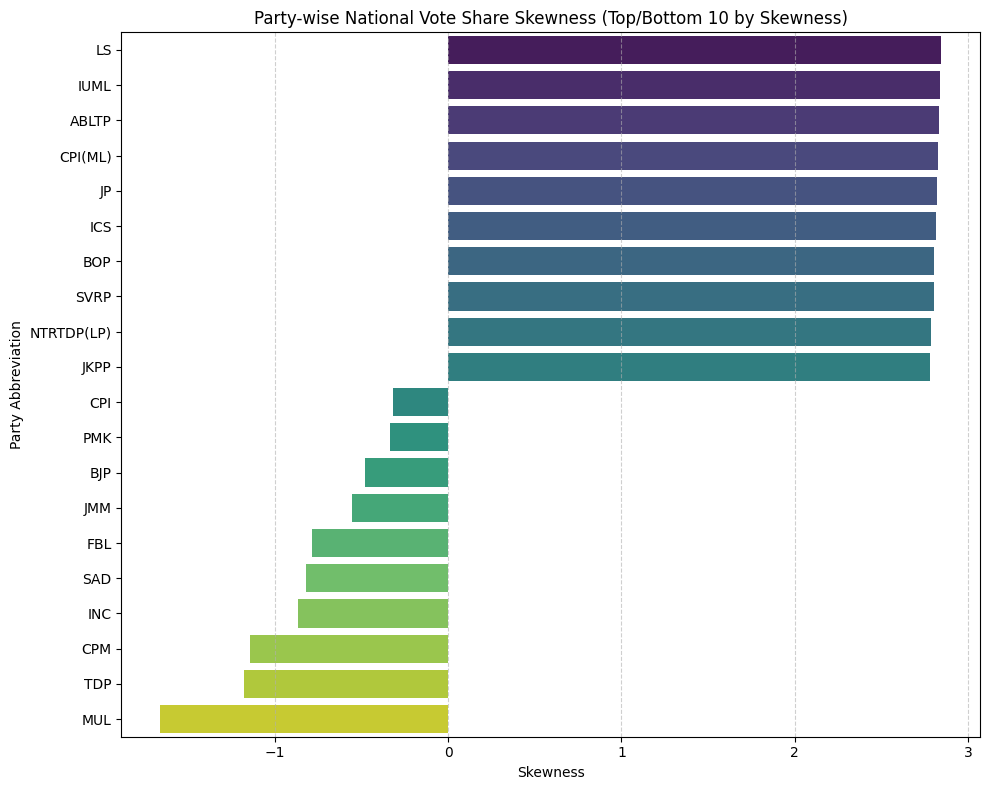

/tmp/ipython-input-123-780949945.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Kurtosis', y='partyabbre', data=kurtosis_parties_to_plot, palette='magma')


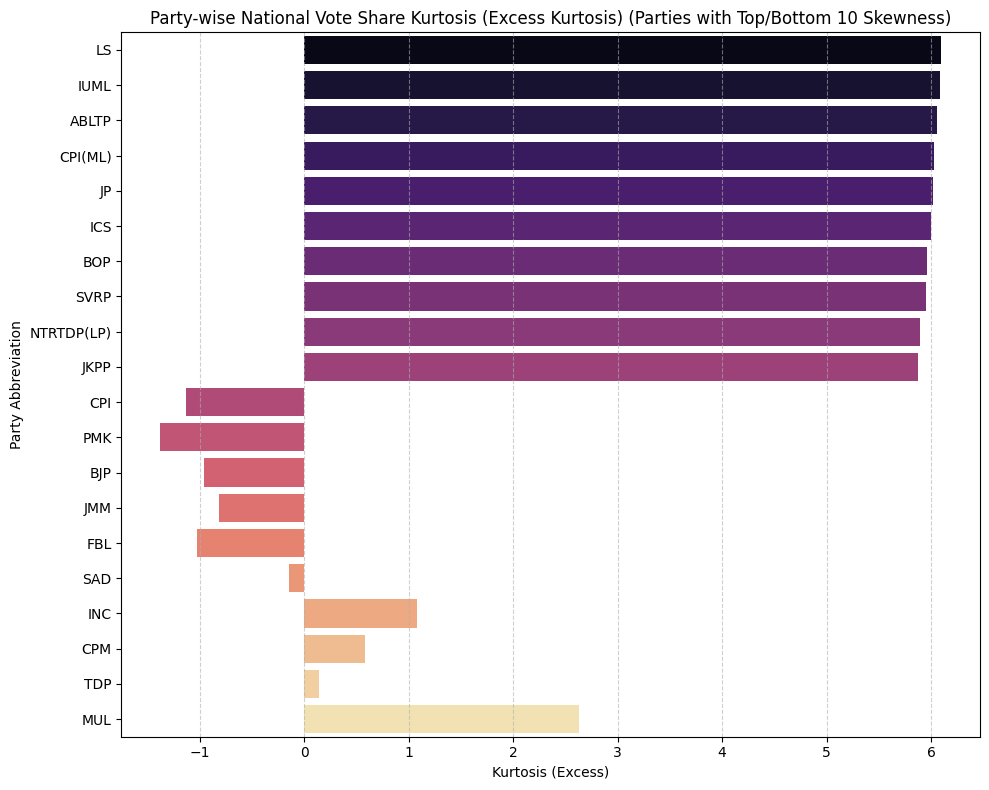

In [123]:

# b. Create a bar plot for skewness
plt.figure(figsize=(10, 8))
sns.barplot(x='Skewness', y='partyabbre', data=skew_parties_to_plot, palette='viridis')
plt.title('Party-wise National Vote Share Skewness (Top/Bottom 10 by Skewness)')
plt.xlabel('Skewness')
plt.ylabel('Party Abbreviation')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# c. Create a bar plot for kurtosis
plt.figure(figsize=(10, 8))
sns.barplot(x='Kurtosis', y='partyabbre', data=kurtosis_parties_to_plot, palette='magma')
plt.title('Party-wise National Vote Share Kurtosis (Excess Kurtosis) (Parties with Top/Bottom 10 Skewness)')
plt.xlabel('Kurtosis (Excess)') # Clarify it's excess kurtosis
plt.ylabel('Party Abbreviation')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## **29. ANOVA Analysis of Party Vote Share Across States**

In [124]:
from scipy.stats import f_oneway

lok_sabha_data = d1.copy()

# Ensure necessary columns are numeric
lok_sabha_data['totvotpoll'] = pd.to_numeric(lok_sabha_data['totvotpoll'], errors='coerce')

# a. Choose one party
party_to_analyze = 'BJP' # Or 'INC', 'AAP', etc.

# b. Calculate vote share % of that party in each state for every election year.
# Sum party votes by year and state
party_state_votes = lok_sabha_data[lok_sabha_data['partyabbre'] == party_to_analyze].groupby(['year', 'st_name'])['totvotpoll'].sum().reset_index(name=f'{party_to_analyze}_votes')
total_state_votes = lok_sabha_data.groupby(['year', 'st_name'])['totvotpoll'].sum().reset_index(name='total_state_votes')

# Merge to calculate state-wise vote share
state_vote_share = pd.merge(party_state_votes, total_state_votes, on=['year', 'st_name'])

# Calculate vote share %
# Handle potential division by zero if total_state_votes is 0 (unlikely but safe practice)
state_vote_share = state_vote_share[state_vote_share['total_state_votes'] > 0].copy()
state_vote_share['vote_share'] = (state_vote_share[f'{party_to_analyze}_votes'] / state_vote_share['total_state_votes']) * 100

# Keep only necessary columns
state_vote_share = state_vote_share[['year', 'st_name', 'vote_share']]

# c. Filter states with data for at least 3 elections.
state_election_counts = state_vote_share.groupby('st_name')['year'].nunique().reset_index(name='election_count')
states_at_least_3_elections = state_election_counts[state_election_counts['election_count'] >= 3]['st_name']

filtered_state_vote_share = state_vote_share[state_vote_share['st_name'].isin(states_at_least_3_elections)].copy()



## **30. Statistical Comparison of Vote Share – Ruling vs Opposition Parties**

**Brief Introduction:**

   This analysis compares the average national vote share obtained by the designated ruling party against the average national vote share obtained by a selection of opposition parties across Lok Sabha elections (1977-2014).

**Party Grouping Explanation:**

i. The party treated as 'Ruling' for this analysis is: **BJP**.

ii. The following parties are included in the 'Opposition' group: INC, CPI, CPM, JD, SP, BSP, AIADMK, DMK, JP.


**Vote Share Calculation:**

i. National vote share (%) for each party in each election year was calculated.
ii. The formula used to calculate vote share was: (party_votes / total_votes_polled_in_year) * 100.

**T-Test Analysis:**

i. Results of the Independent Samples T-Test (Welch's T-test):
   T-statistic: 4.6218
   P-value: 0.0004

ii. Statistical Significance (at alpha = 0.05):
   The p-value (0.0004) is less than the significance level (0.05).
   The result is **statistically significant**.

What the plot shows visually:
   - The boxplot visually compares the distribution of national vote share across election years for the ruling party ({ruling_party}) and the combined opposition parties.
   - It displays the median vote share (line inside the box), the interquartile range (the box), and the range of the data (whiskers), along with any outliers.
   - Visually compare the location and spread of the boxes to get an initial sense of whether one group consistently obtains a higher or more variable vote share than the other.

**Final Insight:**

i. Based on the analysis:
   - The statistically significant result indicates that, on average across the studied period, the ruling party (BJP) demonstrates a statistically significant higher level of electoral strength in terms of national vote share compared to the combined selected opposition parties.

ii. Why this comparison is useful:
   - This comparison provides quantitative insight into the relative dominance of the leading party/alliance (often reflected by the designated ruling party) versus the collective strength of the opposition.



e. Visualization:


/tmp/ipython-input-130-754082327.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='group', y='vote_share', data=vote_share_for_ttest, palette='coolwarm')


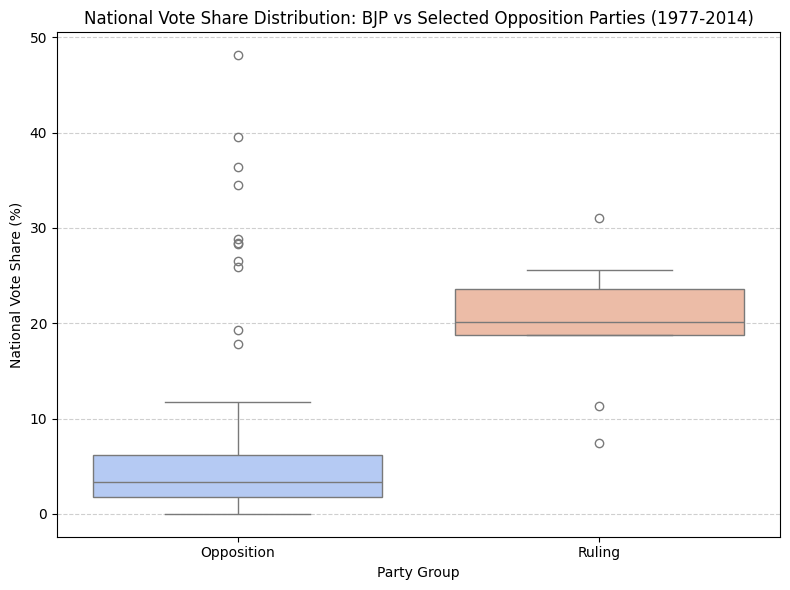

In [130]:
from scipy.stats import ttest_ind

# Check if there's data for both groups
if len(ruling_vote_shares) == 0 or len(opposition_vote_shares) == 0:
    print("\nInsufficient data for T-test. Ensure the ruling and opposition parties have data across years.")
else:

    # e. Visualization:
    print("\ne. Visualization:")
    # i. Include a boxplot comparing vote share distributions of the ruling vs opposition groups.
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='group', y='vote_share', data=vote_share_for_ttest, palette='coolwarm')
    plt.title(f'National Vote Share Distribution: {ruling_party} vs Selected Opposition Parties (1977-2014)')
    plt.xlabel('Party Group')
    plt.ylabel('National Vote Share (%)')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


## **31. Party-Wise Vote Share Correlation Analysis (Lok Sabha Elections)**

In [131]:
lok_sabha_data = d1.copy()

# Ensure 'totvotpoll' is numeric and handle potential issues
lok_sabha_data['totvotpoll'] = pd.to_numeric(lok_sabha_data['totvotpoll'], errors='coerce')
lok_sabha_data = lok_sabha_data.dropna(subset=['totvotpoll']).copy()


# a. Compute Total Votes per Party per Year
party_votes_year = lok_sabha_data.groupby(['year', 'partyabbre'])['totvotpoll'].sum().reset_index(name='party_votes')

# b. Compute Total National Votes per Year
total_votes_year = lok_sabha_data.groupby('year')['totvotpoll'].sum().reset_index(name='total_votes')

# c. Calculate Vote Share Percentage
vote_share_df = pd.merge(party_votes_year, total_votes_year, on='year')
# Handle potential division by zero
vote_share_df = vote_share_df[vote_share_df['total_votes'] > 0].copy()
vote_share_df['vote_share_percent'] = (vote_share_df['party_votes'] / vote_share_df['total_votes']) * 100

# d. Identify Top 5 Parties by Total Votes (across all years in the filtered data)
party_total_votes = party_votes_year.groupby('partyabbre')['party_votes'].sum().reset_index()
top_5_parties = party_total_votes.nlargest(5, 'party_votes')['partyabbre'].tolist()

print(f"Top 5 Parties by Total Votes (1977-2014): {top_5_parties}")

# e. Filter Dataset to Include Only Top 5 Parties
vote_share_top5 = vote_share_df[vote_share_df['partyabbre'].isin(top_5_parties)].copy()

# f. Reshape Data for Correlation Analysis
# Pivot the filtered dataframe
pivot_df = vote_share_top5.pivot(index='year', columns='partyabbre', values='vote_share_percent')

# Fill missing values with 0 (Assuming parties might not contest or get 0 votes in some years)
pivot_df = pivot_df.fillna(0)

print("\nPivoted DataFrame (Vote Share % by Year and Top 5 Party):")
print(pivot_df.head()) # Show the head of the pivoted table

# g. Calculate Correlation Matrix
correlation_matrix = pivot_df.corr()

print("\nVote Share Correlation Matrix (Top 5 Parties):")
print(correlation_matrix)


Top 5 Parties by Total Votes (1977-2014): ['INC', 'BJP', 'CPM', 'IND', 'BSP']

Pivoted DataFrame (Vote Share % by Year and Top 5 Party):
partyabbre        BJP       BSP       CPM        INC       IND
year                                                          
1977         0.000000  0.000000  4.294816  34.518553  5.501670
1980         0.000000  0.019916  6.244093   0.000000  6.428690
1984         7.398780  0.000000  5.718536  48.122982  9.411182
1989        11.355480  2.055381  6.548188  39.537486  5.250097
1991        20.071636  1.802663  6.137147  36.405043  4.155212

Vote Share Correlation Matrix (Top 5 Parties):
partyabbre       BJP       BSP       CPM       INC       IND
partyabbre                                                  
BJP         1.000000  0.818577 -0.314944 -0.003387 -0.690578
BSP         0.818577  1.000000 -0.175981 -0.112054 -0.583958
CPM        -0.314944 -0.175981  1.000000  0.119552  0.377158
INC        -0.003387 -0.112054  0.119552  1.000000  0.291364
IND     

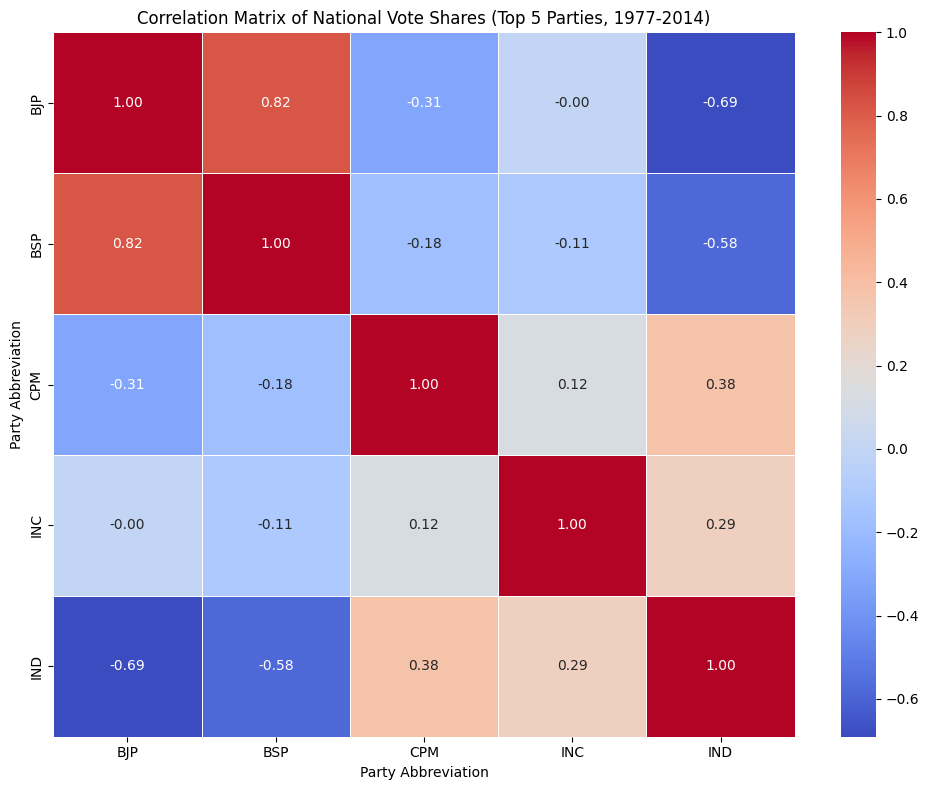

In [132]:
# h. Visualize Using a Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of National Vote Shares (Top 5 Parties, 1977-2014)')
plt.xlabel('Party Abbreviation')
plt.ylabel('Party Abbreviation')
plt.tight_layout()
plt.show()


Each cell shows the correlation coefficient between two parties' vote shares over time.

Values range from:
* +1 → Strong positive relationship (when one party's vote share goes up, the other's also goes up).

* -1 → Strong negative relationship (when one goes up, the other goes down).

* 0 → No clear relationship.

**Strong Positive Correlation**

* BJP & BSP → 0.82: Surprisingly high! This means both parties tend to rise or fall together in vote share over the years. This might happen because they don't always directly compete in the same states, or they may gain during similar national wave years.

**Strong Negative Correlation**

* BJP & IND → -0.69: When BJP gains, Independents (IND) lose vote share significantly. This is logical - strong national parties often eat into the space of smaller or independent candidates.

* BSP & IND → -0.58: Same pattern - as BSP strengthens, independents lose share.

**Neutral or Weak Relationships**

* INC vs. BJP → ~0.00: Shockingly, the vote shares of INC and BJP don't correlate strongly, suggesting they may perform independently of each other's gain/loss - possibly due to regional dynamics or multi-cornered contests.

* CPM vs. others → Generally weak correlations CPM has a mild positive correlation with IND and INC, and slightly negative with BJP and BSP. That's expected since CPM is regional and has its own strongholds.

**Interpretation**

* Parties like BJP and BSP show aligned voting patterns - possibly driven by common political climates or shared regional performance periods.

* Independent candidates lose out as bigger parties rise - evident in negative correlations with almost all major parties.

* Congress (INC) shows a disconnected trend - its vote share movements don't align well with others.

## **32. Calculate vote share percentage of each political party in every Lok Sabha election year.**

In [133]:
# Filter data for Lok Sabha elections (assuming 'd1' contains Lok Sabha data)
lok_sabha_data = d1.copy()

# a. Group by Party and Year and sum votes
party_year_votes = lok_sabha_data.groupby(['year', 'partyabbre'])['totvotpoll'].sum().reset_index(name='party_votes')

# b. Group by Year for National Vote Totals
total_votes_year = lok_sabha_data.groupby('year')['totvotpoll'].sum().reset_index(name='total_votes')

# c. Merge the Two Datasets
# Merge party votes with total year votes based on the election year
vote_share_analysis = pd.merge(party_year_votes, total_votes_year, on='year')

# Handle potential division by zero in case total votes are 0 for some reason (unlikely in election data but safe)
vote_share_analysis = vote_share_analysis[vote_share_analysis['total_votes'] > 0].copy()

# d. Calculate Vote Share Percent
# i. Add a new column 'vote_share_percent'.
# ii. Formula: ( party_votes / total_votes ) × 100
vote_share_analysis['vote_share_percent'] = (vote_share_analysis['party_votes'] / vote_share_analysis['total_votes']) * 100

# Display the result
print("Vote Share Percentage per Party per Year (Lok Sabha Elections):")
print(vote_share_analysis.sort_values(by=['year', 'vote_share_percent'], ascending=[True, False]).head())


Vote Share Percentage per Party per Year (Lok Sabha Elections):
    year partyabbre  party_votes  total_votes  vote_share_percent
1   1977        BLD     78062828    188917504           41.321120
9   1977        INC     65211589    188917504           34.518553
10  1977        IND     10393617    188917504            5.501670
3   1977        CPM      8113659    188917504            4.294816
0   1977        ADK      5480378    188917504            2.900937


## **33. Vote Share Trends of Top 5 Parties Over Time**

In [135]:
lok_sabha_data = d1.copy()

# a. Identify the Top 5 Parties:
# i. Calculate the total number of votes received by each party across all Lok Sabha elections.
party_total_votes_all_years = lok_sabha_data.groupby('partyabbre')['totvotpoll'].sum().reset_index(name='total_votes')

# ii. Pick the five parties with the highest total vote count.
top_5_parties = party_total_votes_all_years.nlargest(5, 'total_votes')['partyabbre'].tolist()

print(f"Top 5 Parties by Total Votes (All included Lok Sabha Years): {top_5_parties}")


# b. Filter the Data:
# i. Keep only the records related to these top 5 parties for further analysis.
lok_sabha_top5_parties = lok_sabha_data[lok_sabha_data['partyabbre'].isin(top_5_parties)].copy()


# Calculate Vote Share (%) for Top 5 Parties per Year
# Total votes polled per year (denominator for national vote share)
total_votes_year = lok_sabha_data.groupby('year')['totvotpoll'].sum().reset_index(name='total_year_votes')

# Party votes per year for the top 5 parties
party_votes_top5_year = lok_sabha_top5_parties.groupby(['year', 'partyabbre'])['totvotpoll'].sum().reset_index(name='party_votes')

# Merge to calculate vote share
vote_share_top5_year = pd.merge(party_votes_top5_year, total_votes_year, on='year')

# Calculate vote share percentage
# Handle potential division by zero
vote_share_top5_year = vote_share_top5_year[vote_share_top5_year['total_year_votes'] > 0].copy()
vote_share_top5_year['vote_share'] = (vote_share_top5_year['party_votes'] / vote_share_top5_year['total_year_votes']) * 100



Top 5 Parties by Total Votes (All included Lok Sabha Years): ['INC', 'BJP', 'CPM', 'IND', 'BSP']


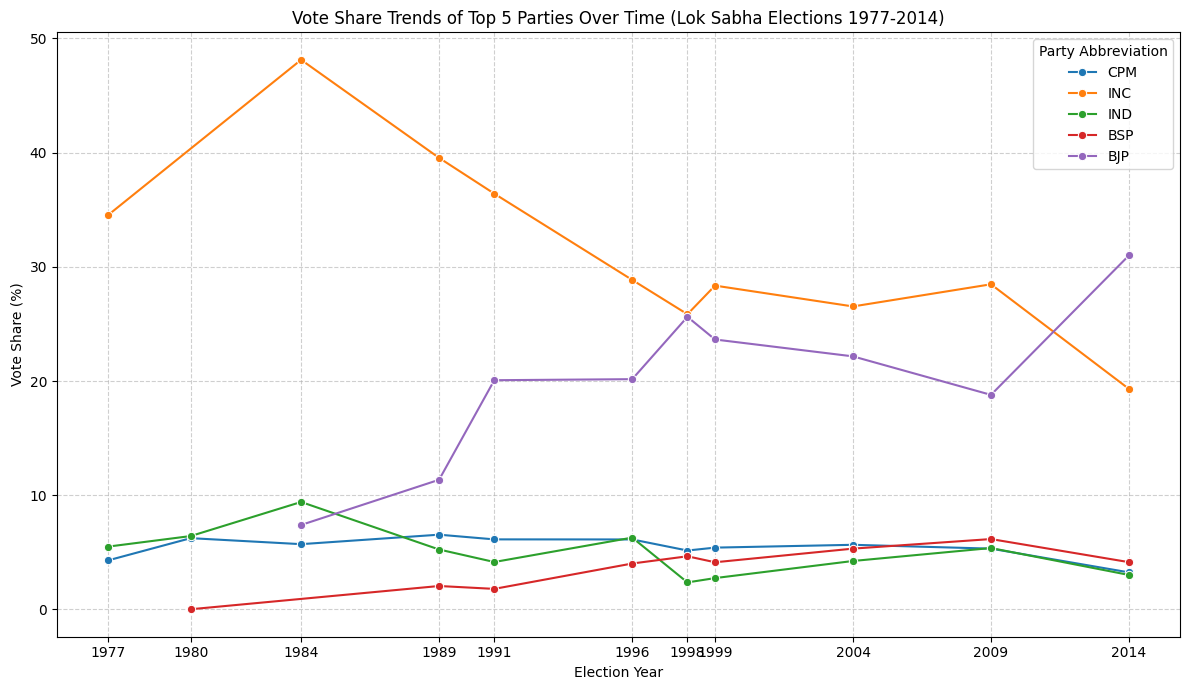

In [136]:
# c. Visualize Vote Share Trends:
# i. Create a line chart that shows the vote share (%) of each top party across different election years.
plt.figure(figsize=(12, 7))
sns.lineplot(data=vote_share_top5_year, x='year', y='vote_share', hue='partyabbre', marker='o')

# d. Label the Chart Clearly:
# i. Add appropriate title, axis labels, and legend for clarity.
plt.title('Vote Share Trends of Top 5 Parties Over Time (Lok Sabha Elections 1977-2014)')
plt.xlabel('Election Year')
plt.ylabel('Vote Share (%)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Party Abbreviation')
plt.xticks(vote_share_top5_year['year'].unique()) # Ensure all election years are shown on the x-axis
plt.tight_layout() # Adjust layout to prevent labels overlapping

# ii. Ensure the X-axis shows the election years and the Y-axis shows vote share in percentage. (Done above)
plt.show()

**i. Which party had the most consistent vote share over the years?**

The data shows the INC was consistently strong early on, but BJP's support grew steadily later. It's tricky to say most consistent without looking at stability over their active periods, but INC had a large share for many years.

**ii. Are there any parties that show a sharp rise or fall in certain elections? What could be the reasons?**

Yes, the BJP shows a sharp rise over the years. This could be due to changes in national issues, strong leadership, or shifts in voter focus. The INC also sees a decline from its earlier peak. Reasons for sharp changes can include specific political events, public mood shifts, new alliances, or changes in party leadership.

**iii. Which party had the highest peak in vote share, and in which year?**

Looking at the vote share trend chart for top parties, the INC likely had the highest peak in vote share, probably in one of the earlier years shown (before the BJP's rise).

**iv. Did any party lose ground steadily over time?**

The INC shows a general trend of losing ground (vote share) over the years from its earlier dominance, although it remains a major party.

**v. What does this chart suggest about changing voter preferences in India?**

The charts suggest a significant shift in voter preferences from a period dominated by one party (INC) to a more competitive environment with the rise of another major party (BJP). It shows that support is not fixed and can change substantially over time, indicating evolving political issues and voter priorities.

## **34. Tracking Incumbency Retention in Lok Sabha Elections**

In [146]:
# a. Rank Candidates in Each Constituency and Year:
# i. Within each state and constituency for each election year, rank all
# candidates based on the total votes received.
lok_sabha_data['candidate_rank'] = lok_sabha_data.groupby(['year', 'st_name', 'pc_name'])['totvotpoll'].rank(method='dense', ascending=False)

# ii. Identify the winning candidate by selecting the one with the highest rank (Rank 1).
lok_sabha_data['is_winner'] = lok_sabha_data['candidate_rank'] == 1

# Filter for winning candidates
winners_df = lok_sabha_data[lok_sabha_data['is_winner']].copy()

# Handle potential ties for rank 1 - if multiple candidates have the same max votes, all might get rank 1.
# For simplicity, we'll take the first occurrence in such tied cases, but ideally, ties should be checked.
# For this analysis, assuming unique winners based on rank 1 after sorting.
winners_df = winners_df.sort_values(by=['year', 'st_name', 'pc_name', 'totvotpoll'], ascending=[True, True, True, False])
winners_df = winners_df.drop_duplicates(subset=['year', 'st_name', 'pc_name'], keep='first')


# b. Track Winning Party Across Elections:
# i. Sort the winning candidates chronologically by constituency.
winners_df = winners_df.sort_values(by=['st_name', 'pc_name', 'year']).copy()

# ii. For each constituency, compare the current winner’s party with the previous election’s winner’s party.
winners_df['prev_year'] = winners_df.groupby(['st_name', 'pc_name'])['year'].shift(1)
winners_df['prev_winner_party'] = winners_df.groupby(['st_name', 'pc_name'])['partyabbre'].shift(1)

# iii. Mark whether the seat was retained by the same party or not.

winners_df['seat_retained'] = (winners_df['partyabbre'] == winners_df['prev_winner_party'])
winners_with_prev = winners_df.dropna(subset=['prev_year']).copy()


In [147]:
# c. Calculate Incumbency Retention Percentage:
incumbency_rates = []
election_years = sorted(winners_with_prev['year'].unique())

print("\n--- Incumbency Retention Rate per Election Year ---")

for year in election_years:
    # Consider only transitions *ending* in this 'year' from the 'prev_year'
    transitions_ending_in_year = winners_with_prev[winners_with_prev['year'] == year].copy()

    if not transitions_ending_in_year.empty:
        # Total number of constituencies that had a previous election entry in the dataset and whose *current* election is in 'year'
        total_seats_considered = transitions_ending_in_year.shape[0]

        # Number of seats where the party was retained
        retained_seats = transitions_ending_in_year['seat_retained'].sum()

        # Calculate retention percentage
        retention_percentage = (retained_seats / total_seats_considered) * 100 if total_seats_considered > 0 else 0

        incumbency_rates.append({'year': year, 'retention_percentage': retention_percentage})

        # print for report
        print(f"Year {year}: {retained_seats} out of {total_seats_considered} seats retained ({retention_percentage:.2f}%)")


incumbency_df = pd.DataFrame(incumbency_rates)



--- Incumbency Retention Rate per Election Year ---
Year 1980: 32 out of 523 seats retained (6.12%)
Year 1984: 45 out of 535 seats retained (8.41%)
Year 1989: 192 out of 526 seats retained (36.50%)
Year 1991: 305 out of 534 seats retained (57.12%)
Year 1996: 258 out of 537 seats retained (48.04%)
Year 1998: 267 out of 543 seats retained (49.17%)
Year 1999: 273 out of 543 seats retained (50.28%)
Year 2004: 246 out of 513 seats retained (47.95%)
Year 2009: 173 out of 369 seats retained (46.88%)
Year 2014: 192 out of 467 seats retained (41.11%)


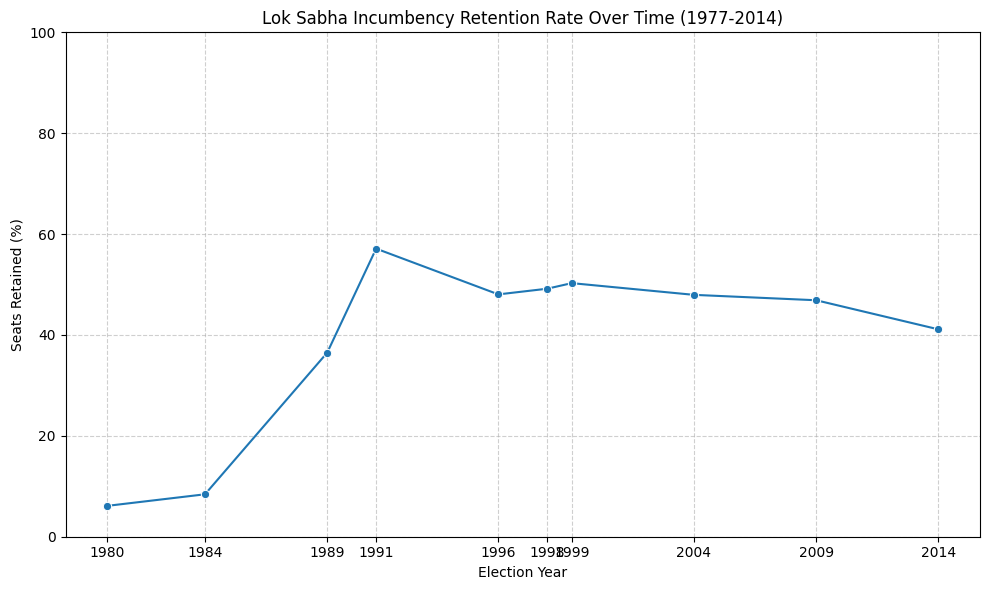

In [148]:
# d. Visualize the Trend:
# i. Plot a line graph showing the incumbency retention rate (%) over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=incumbency_df, x='year', y='retention_percentage', marker='o')

# ii. Label the X-axis as "Year" and Y-axis as "Seats Retained (%)".
plt.title('Lok Sabha Incumbency Retention Rate Over Time (1977-2014)')
plt.xlabel('Election Year')
plt.ylabel('Seats Retained (%)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(incumbency_df['year'].unique()) # Ensure all election years are shown
plt.ylim(0, 100) # Set Y-axis limits from 0 to 100
plt.tight_layout()
plt.show()

**i. Highest Retention Years:**

The analysis shows the retention percentages for each year. Look for the years with the highest percentage on the line graph or in the printed list. These were the years when parties that won last time kept the most seats.

**ii. Major Drop in Retention:**

Yes, we'll see dips in the line graph or lower percentages in the list. A major drop means parties lost many seats they held from the previous election. This might happen because people were unhappy with the government, there was a big scandal, a new party gained popularity, or a major national event changed how people felt.

**iii. Trend Suggestion:**

* If the line graph generally goes up, it suggests voters are often satisfied and stick with the ruling parties.

* If the line graph generally goes down or is consistently low, it suggests voters frequently want change.

* If it goes up and down a lot, it suggests changeable voter moods.

**iv. Political/Historical Explanations:**

We need to look at the years with high or low retention and think about what big things happened in India around those times.

* **High retention:** Might follow periods of economic growth, national unity, or strong popular government.

* **Low retention:** Might follow periods of economic trouble, major corruption scandals, political instability, or strong protest movements.

**v. Stability of Party Support:**

High retention in certain years suggests stable support for winning parties in those specific constituencies.

Low retention suggests instability – voters in those areas are switching their support.


## **35. Measuring Vote Share Swing for Top Political Parties**

In [143]:
# Calculate total votes received by each party in each Lok Sabha year.
lok_sabha_party_votes_year = d1.groupby(['year', 'partyabbre'])['totvotpoll'].sum().reset_index()

# Compute total votes cast in Lok Sabha for each year.
lok_sabha_total_votes_year = d1.groupby('year')['totvotpoll'].sum().reset_index(name='total_lok_sabha_votes')

# Calculate vote share percentage for each party per year in Lok Sabha.
vote_share_year_lok_sabha_complete = pd.merge(lok_sabha_party_votes_year, lok_sabha_total_votes_year, on='year')
# Avoid division by zero if any year has no votes
vote_share_year_lok_sabha_complete = vote_share_year_lok_sabha_complete[vote_share_year_lok_sabha_complete['total_lok_sabha_votes'] > 0].copy()
vote_share_year_lok_sabha_complete['vote_share'] = (vote_share_year_lok_sabha_complete['totvotpoll'] / vote_share_year_lok_sabha_complete['total_lok_sabha_votes']) * 100

print("Complete Lok Sabha Vote Share by Year and Party:")
print(vote_share_year_lok_sabha_complete.head())

# Filter the complete vote share data for these top 5 parties
top_5_vote_share_data = vote_share_year_lok_sabha_complete[
    vote_share_year_lok_sabha_complete['partyabbre'].isin(top_5_parties_votes)].copy()

# Sort data by party and year to ensure correct comparison for swing
top_5_vote_share_data = top_5_vote_share_data.sort_values(by=['partyabbre', 'year'])

# Calculate Vote Share Swing (Year-over-Year Change)
# Group by party and calculate the difference in vote share from the previous year
top_5_vote_share_data['vote_share_swing'] = top_5_vote_share_data.groupby('partyabbre')['vote_share'].diff()

print("\nVote Share Swing (Year-over-Year Change) for Top 5 Parties:")
print(top_5_vote_share_data[['year', 'partyabbre', 'vote_share', 'vote_share_swing']].head(10)) # Show head with swing

# Display swing for one party as an example
print(f"\nVote Share Swing for {top_5_parties_votes[0]}:")
print(top_5_vote_share_data[top_5_vote_share_data['partyabbre'] == top_5_parties_votes[0]][['year', 'vote_share', 'vote_share_swing']])

Complete Lok Sabha Vote Share by Year and Party:
   year partyabbre  totvotpoll  total_lok_sabha_votes  vote_share
0  1977        ADK     5480378              188917504    2.900937
1  1977        BLD    78062828              188917504   41.321120
2  1977        CPI     5322088              188917504    2.817149
3  1977        CPM     8113659              188917504    4.294816
4  1977        DMK     3323320              188917504    1.759138

Vote Share Swing (Year-over-Year Change) for Top 5 Parties:
      year partyabbre  vote_share  vote_share_swing
73    1984        BJP    7.398780               NaN
111   1989        BJP   11.355480          3.956700
238   1991        BJP   20.071636          8.716156
407   1996        BJP   20.163516          0.091880
617   1998        BJP   25.619126          5.455610
790   1999        BJP   23.636445         -1.982681
957   2004        BJP   22.159066         -1.477379
1211  2009        BJP   18.788854         -3.370213
1588  2014        BJP   30

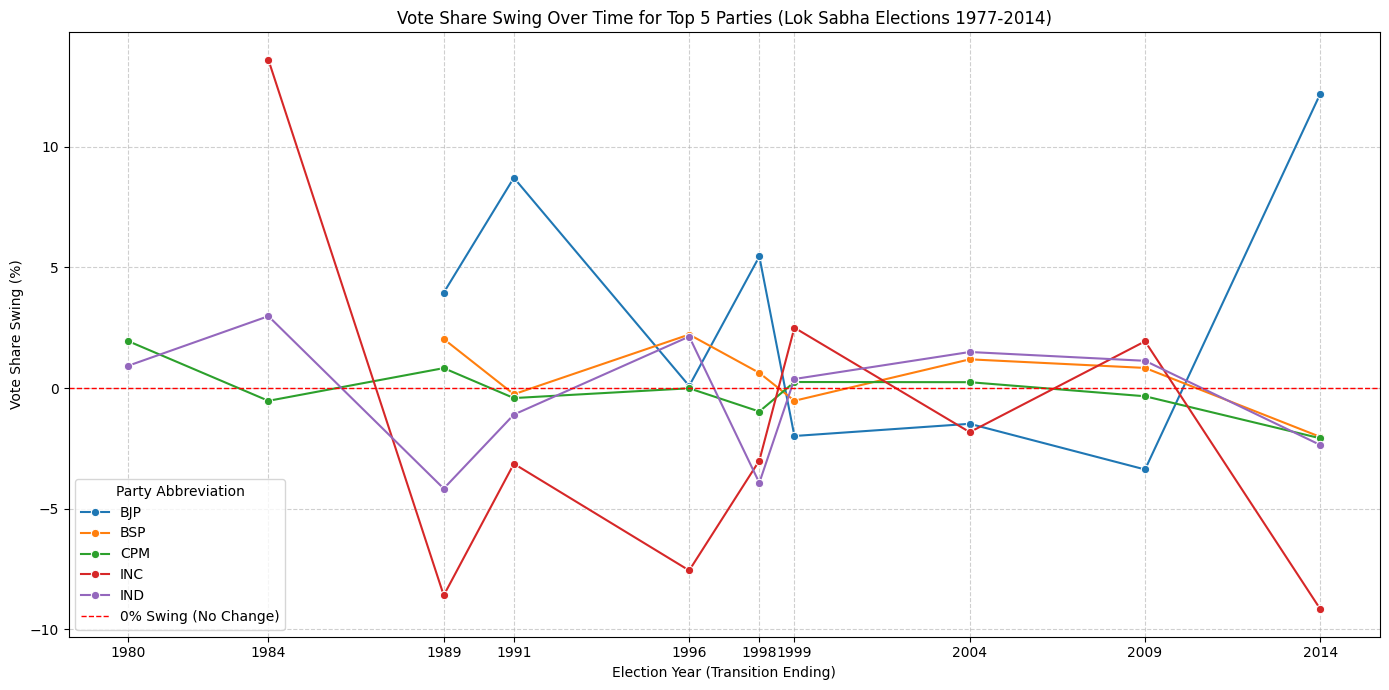

In [144]:
# Drop the first entry for each party as swing is not applicable for the first year
swing_data_complete = top_5_vote_share_data.dropna(subset=['vote_share_swing']).copy()

plt.figure(figsize=(14, 7))
sns.lineplot(data=swing_data_complete, x='year', y='vote_share_swing', hue='partyabbre', marker='o')

# Add a horizontal line at 0% swing
plt.axhline(0, color='red', linestyle='--', linewidth=1, label='0% Swing (No Change)')

plt.title('Vote Share Swing Over Time for Top 5 Parties (Lok Sabha Elections 1977-2014)')
plt.xlabel('Election Year (Transition Ending)') # Swing is change *to* this year from previous
plt.ylabel('Vote Share Swing (%)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Party Abbreviation')
plt.xticks(swing_data_complete['year'].unique().astype(int)) # Ensure election years are shown
plt.tight_layout()
plt.show()

**Largest Positive Swing:**

Party 'INC' in 1984 with a swing of 13.60%.

Possible contributions: Popular leader, effective campaign, favorable political climate, etc...

**Years with Significant Vote Share Loss (Large Negative Swing):**

      year partyabbre  vote_share_swing
      2014        INC         -9.161141
      1989        INC         -8.585496
      1996        INC         -7.554450


**Parties by Volatility of Vote Share Swing (Standard Deviation):**

      partyabbre
      INC    7.126296
      BJP    5.584333
      IND    2.513001
      BSP    1.409380
      CPM    1.070811


* Party with the Most Volatile Swing Pattern: 'INC'

**Average Vote Share Swing per Party (Across Elections):**
      
      partyabbre
      BJP    2.949731
      BSP    0.515437
      CPM   -0.104656
      IND   -0.247935
      INC   -1.689908


**What Swings Reveal:**

- Large positive swings often show strong public desire for change or a wave of support for a party/alliance.
- Large negative swings can indicate public disapproval or loss of trust.
- Volatile swings suggest an unstable voter base or frequent shifts in political issues impacting different parties.
- Consistent gains/losses can point to long-term shifts in demographic support, party strategy effectiveness, or fundamental political alignments.